### Modifed fetcher (3000 samples)

Include the analysis script and setup the folders with raw data

In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/just_fetch/")
s3_folder_filter="1711-justfetch-2/s3/*benchmark_e2e*"
scratch_folder_filter="1711-justfetch-2/scratch/*benchmark_e2e*"

#### Load raw

In [3]:
df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 246.57it/s]


In [4]:
df_gpuutil_s3 = extract_gpuutil(output_base_folder, folder_filter=s3_folder_filter, ms=False)
df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter, ms=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 7739.63it/s]


timestamp False


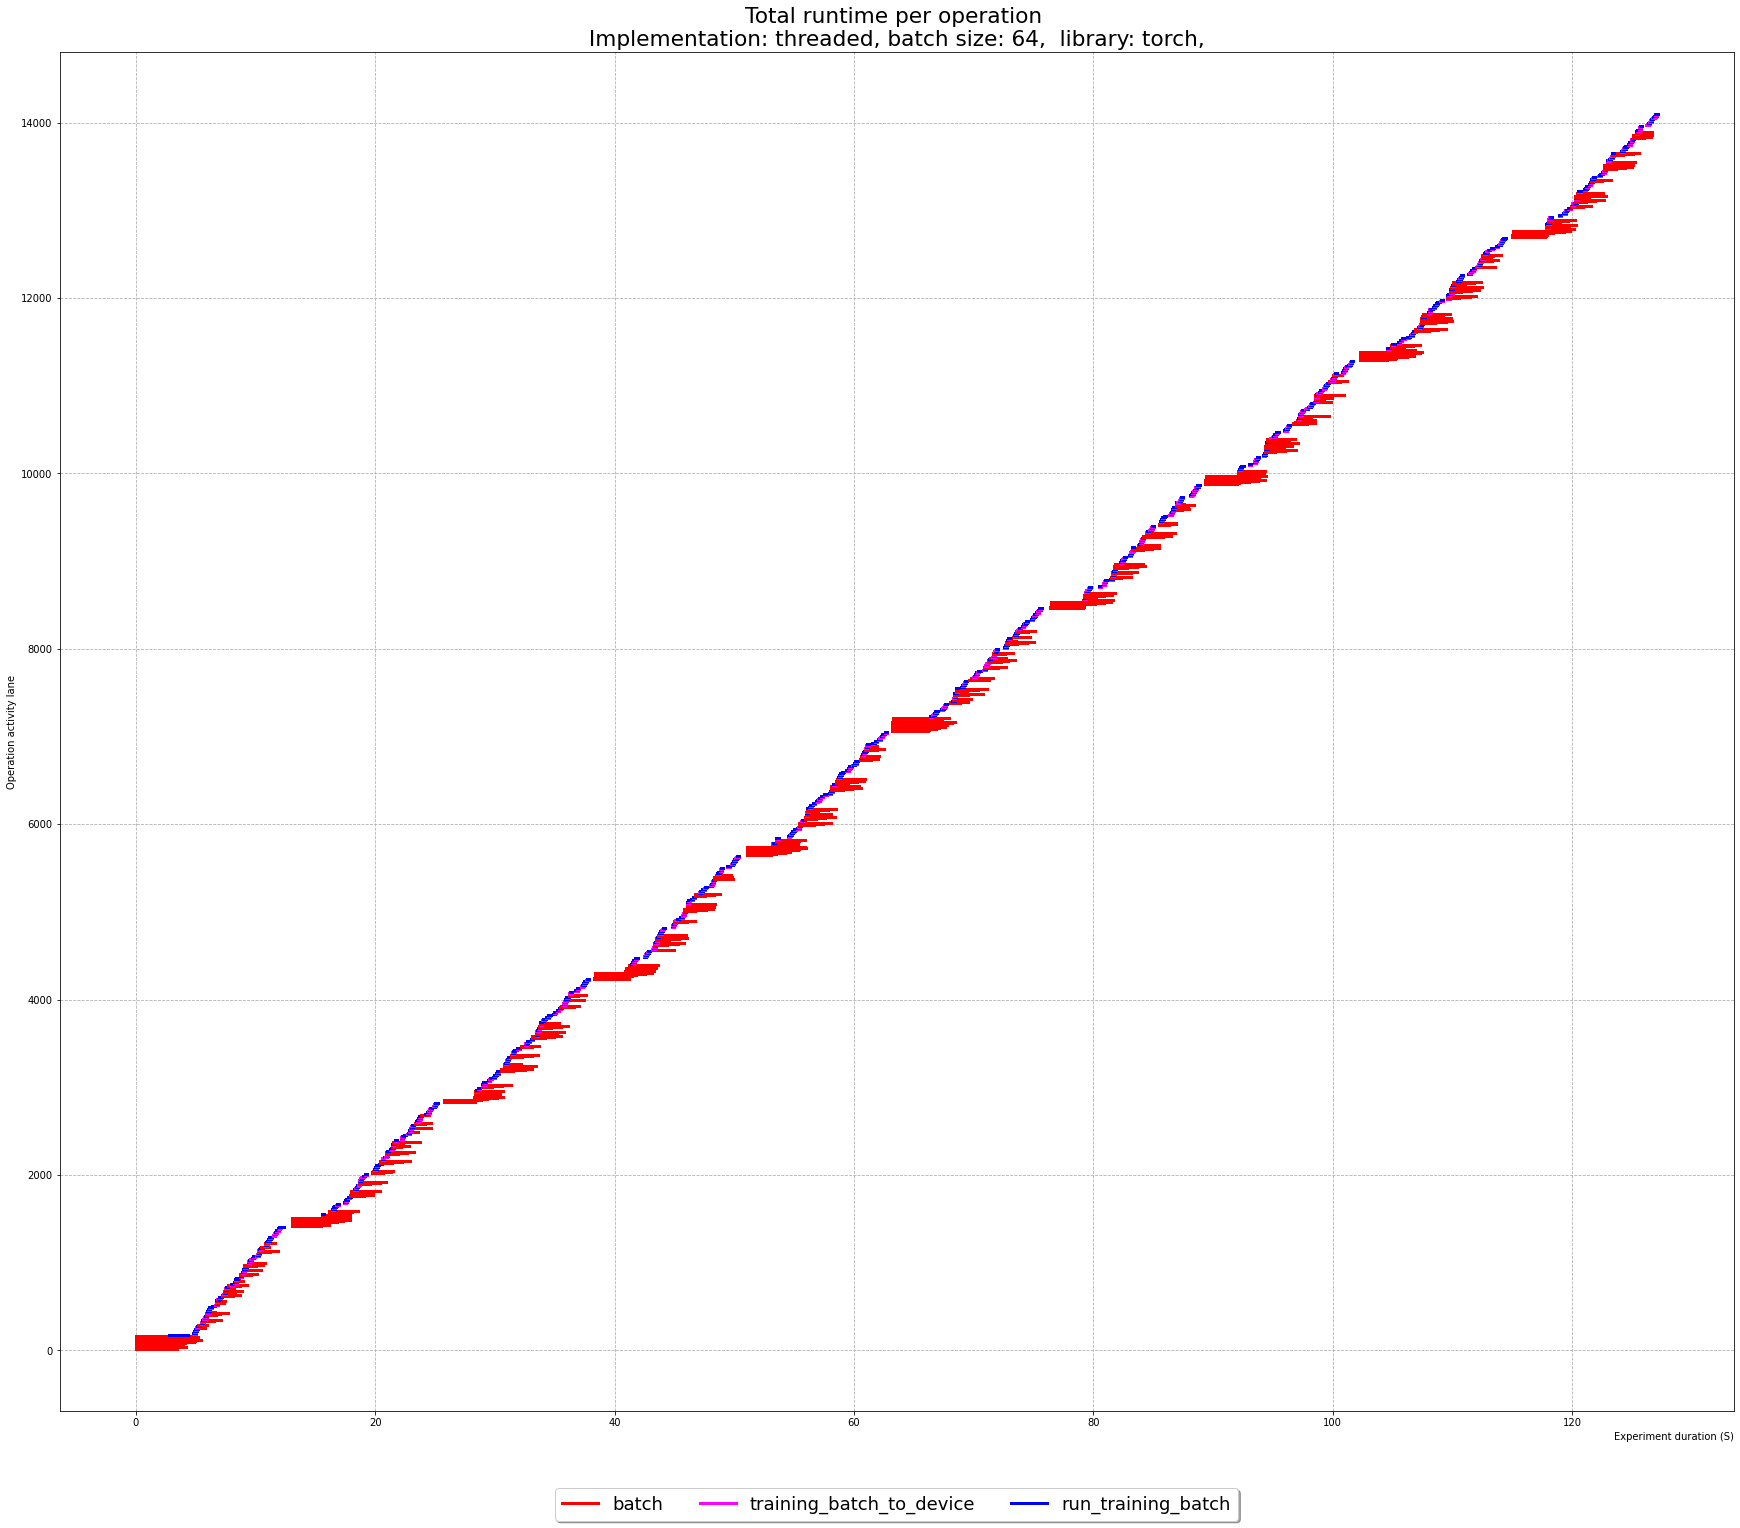

timestamp False


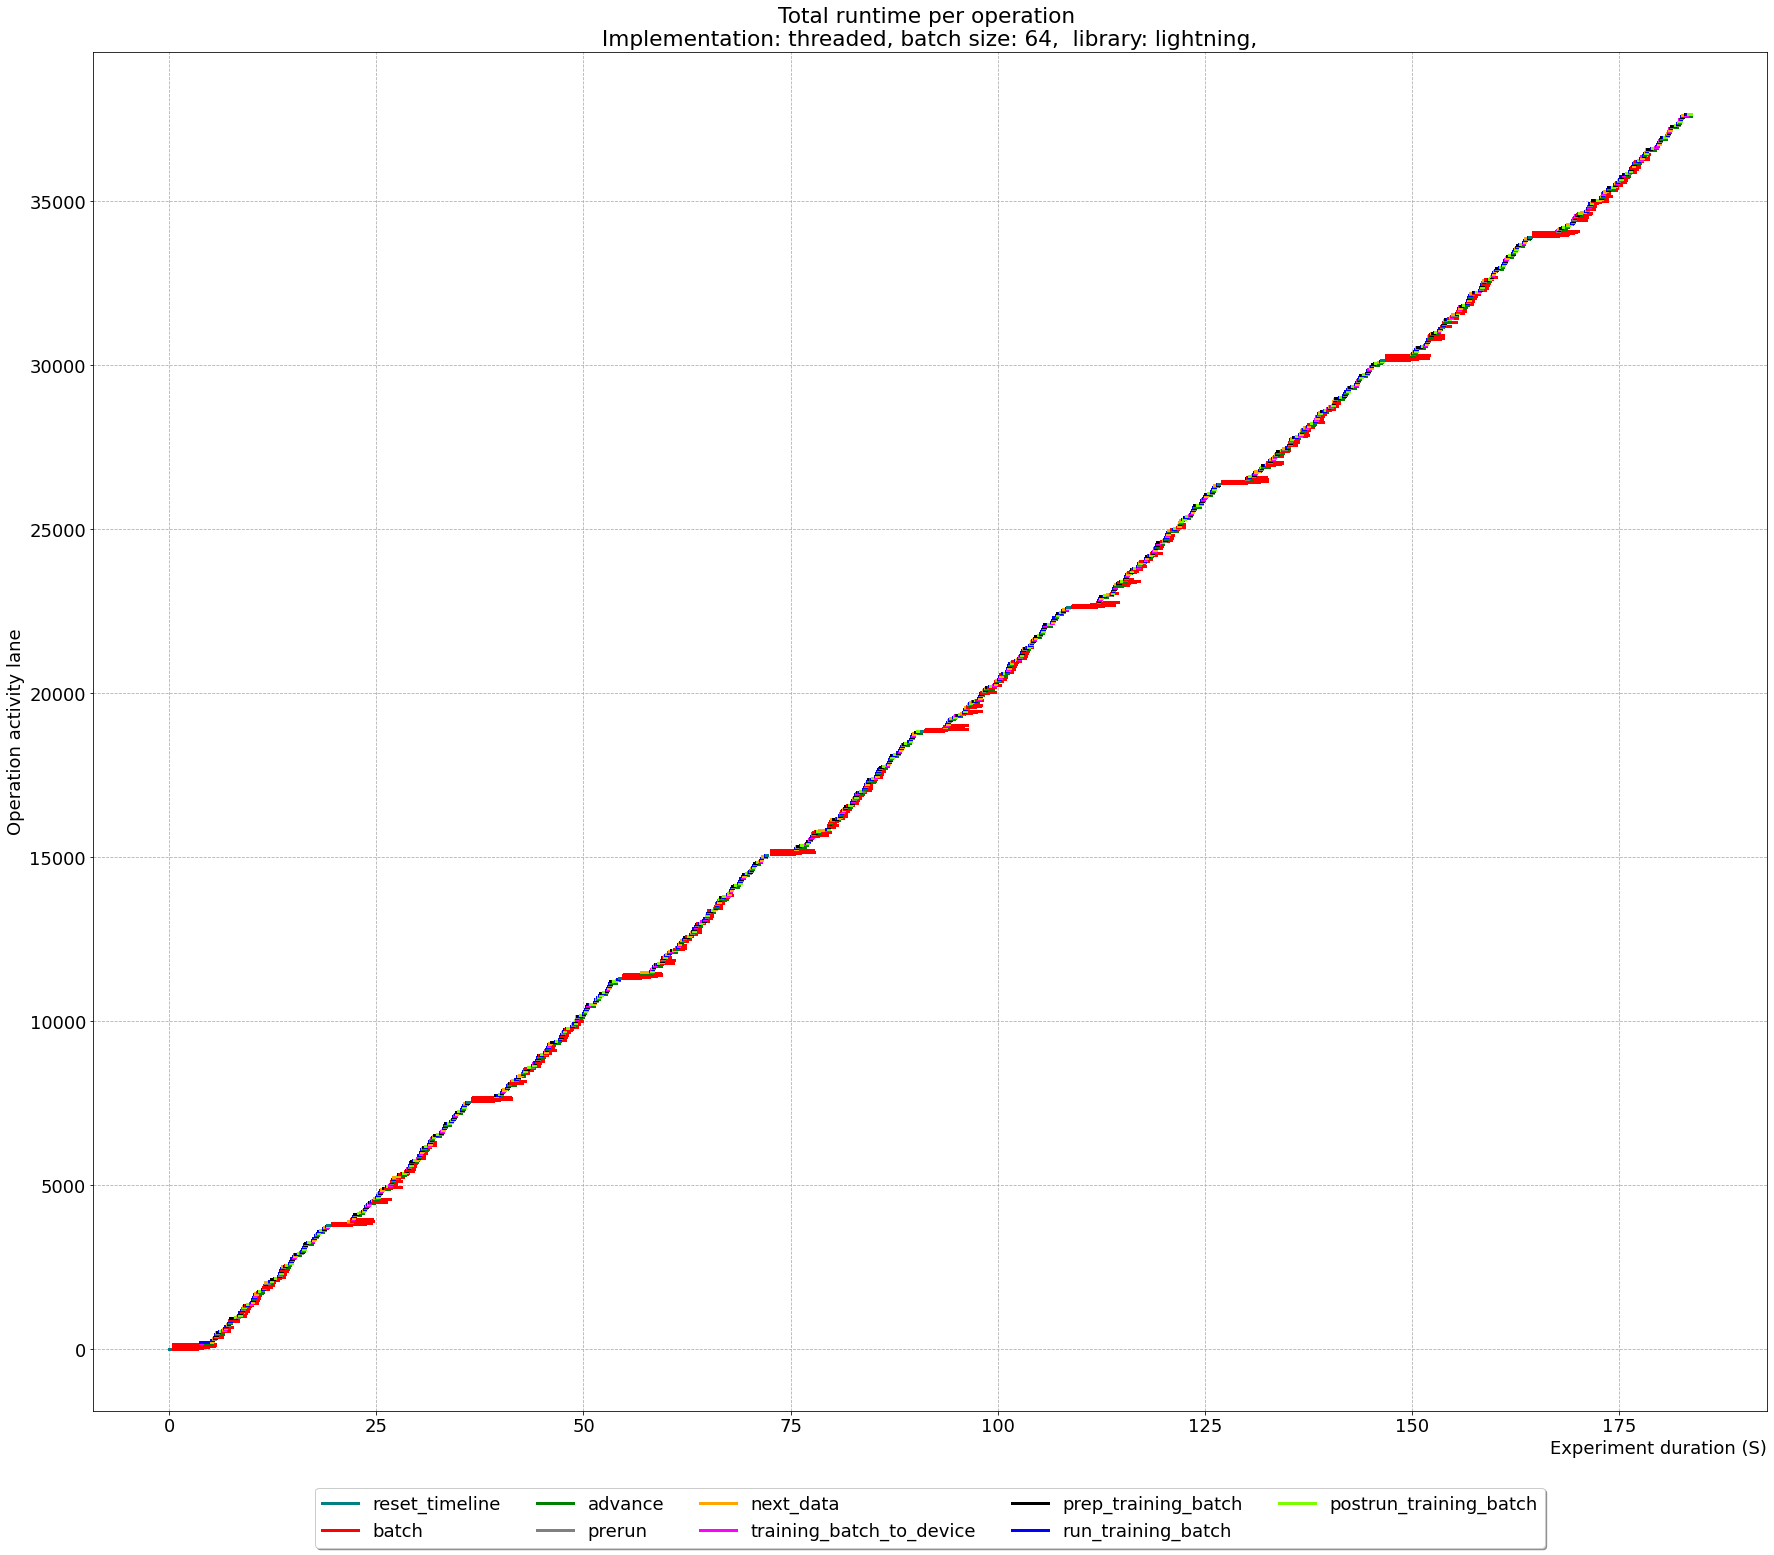

timestamp False


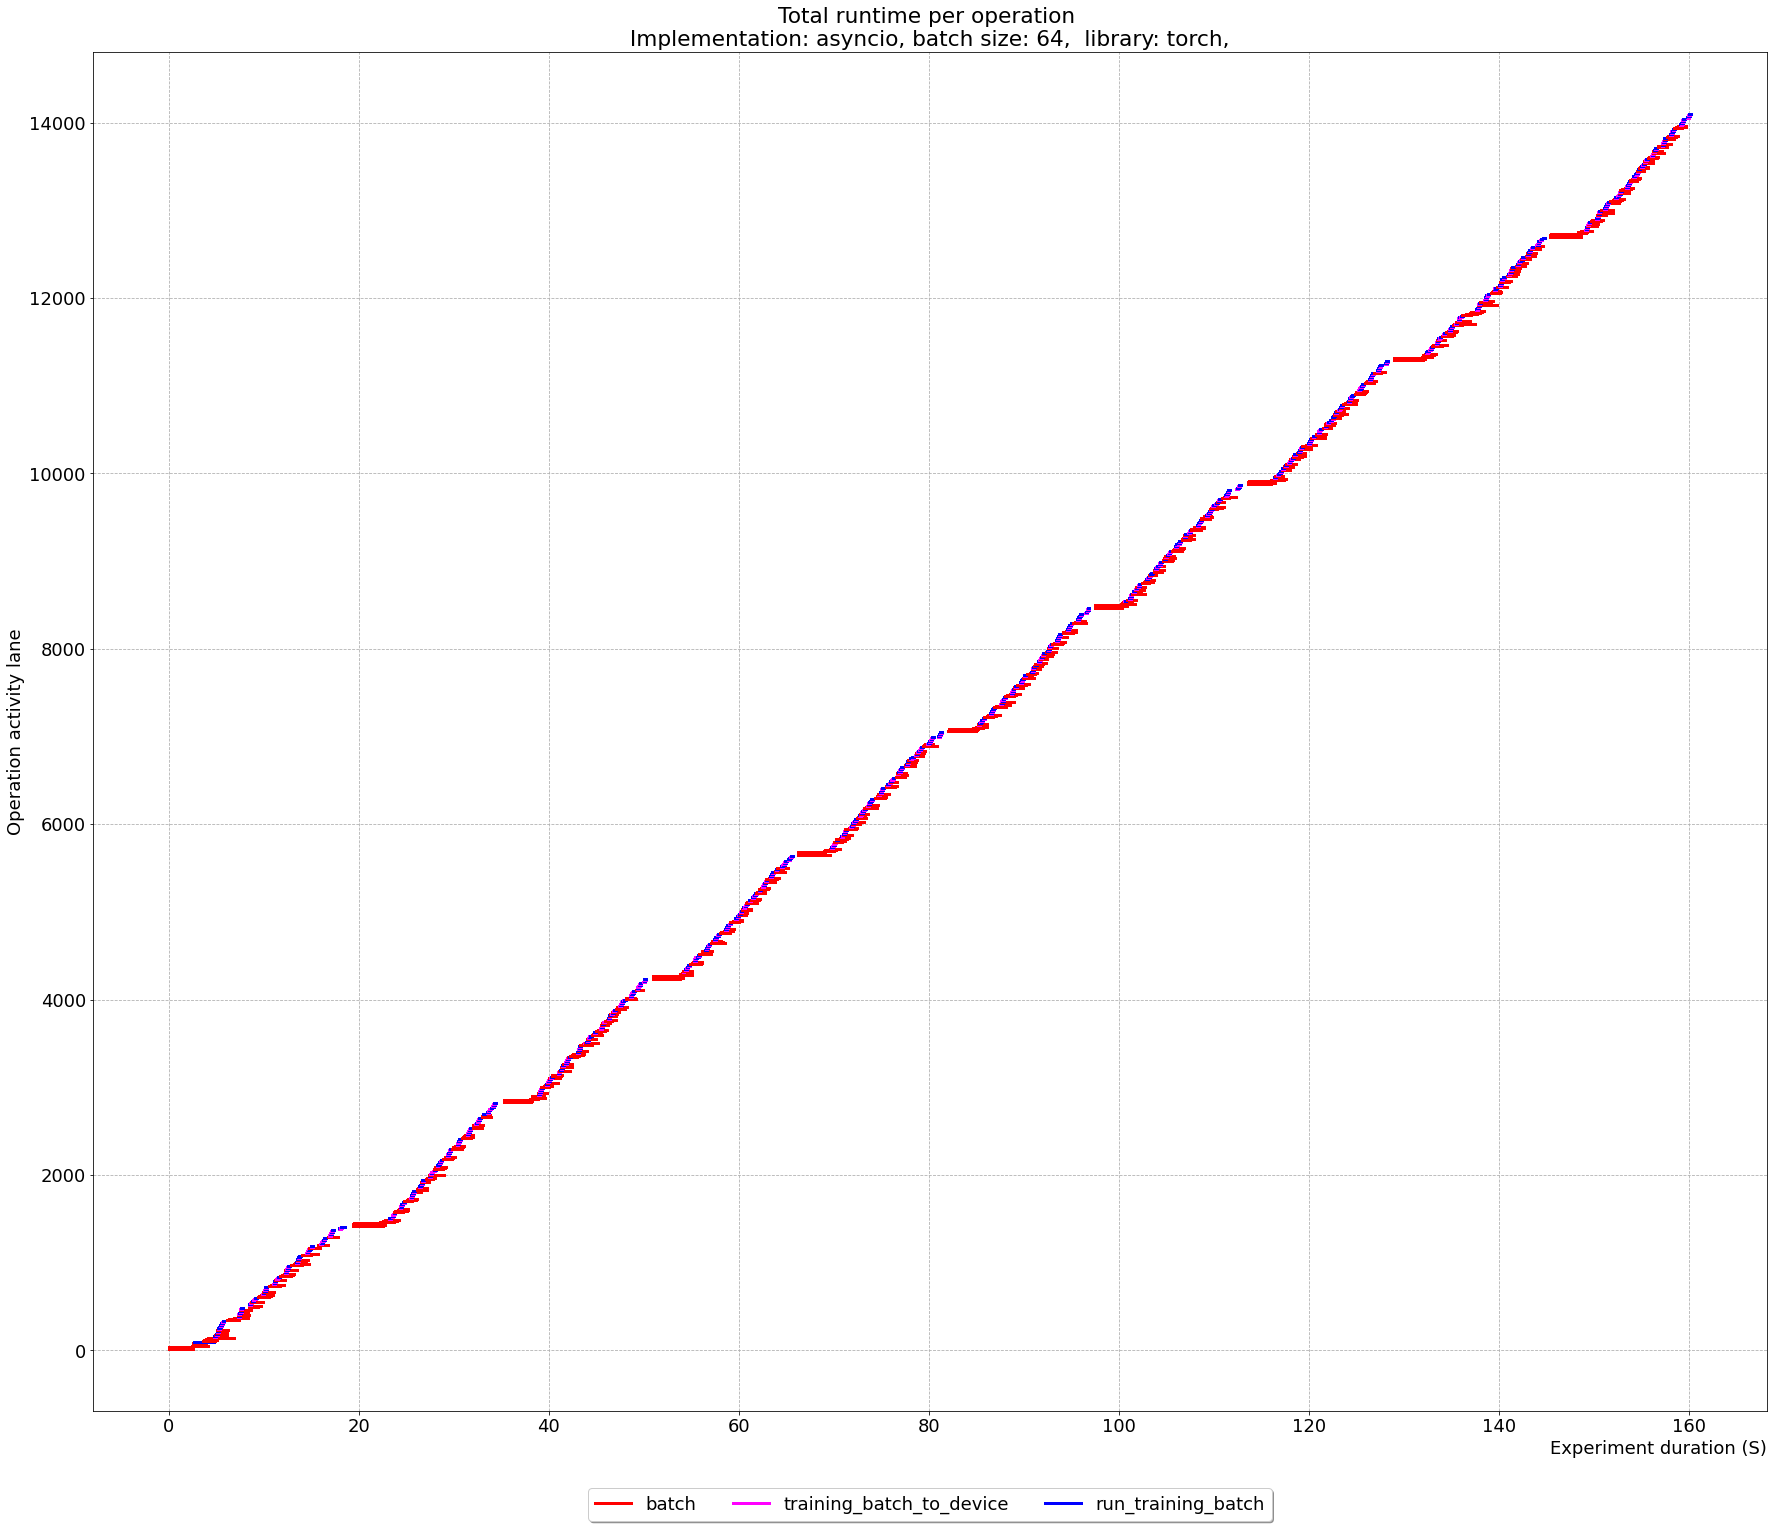

timestamp False


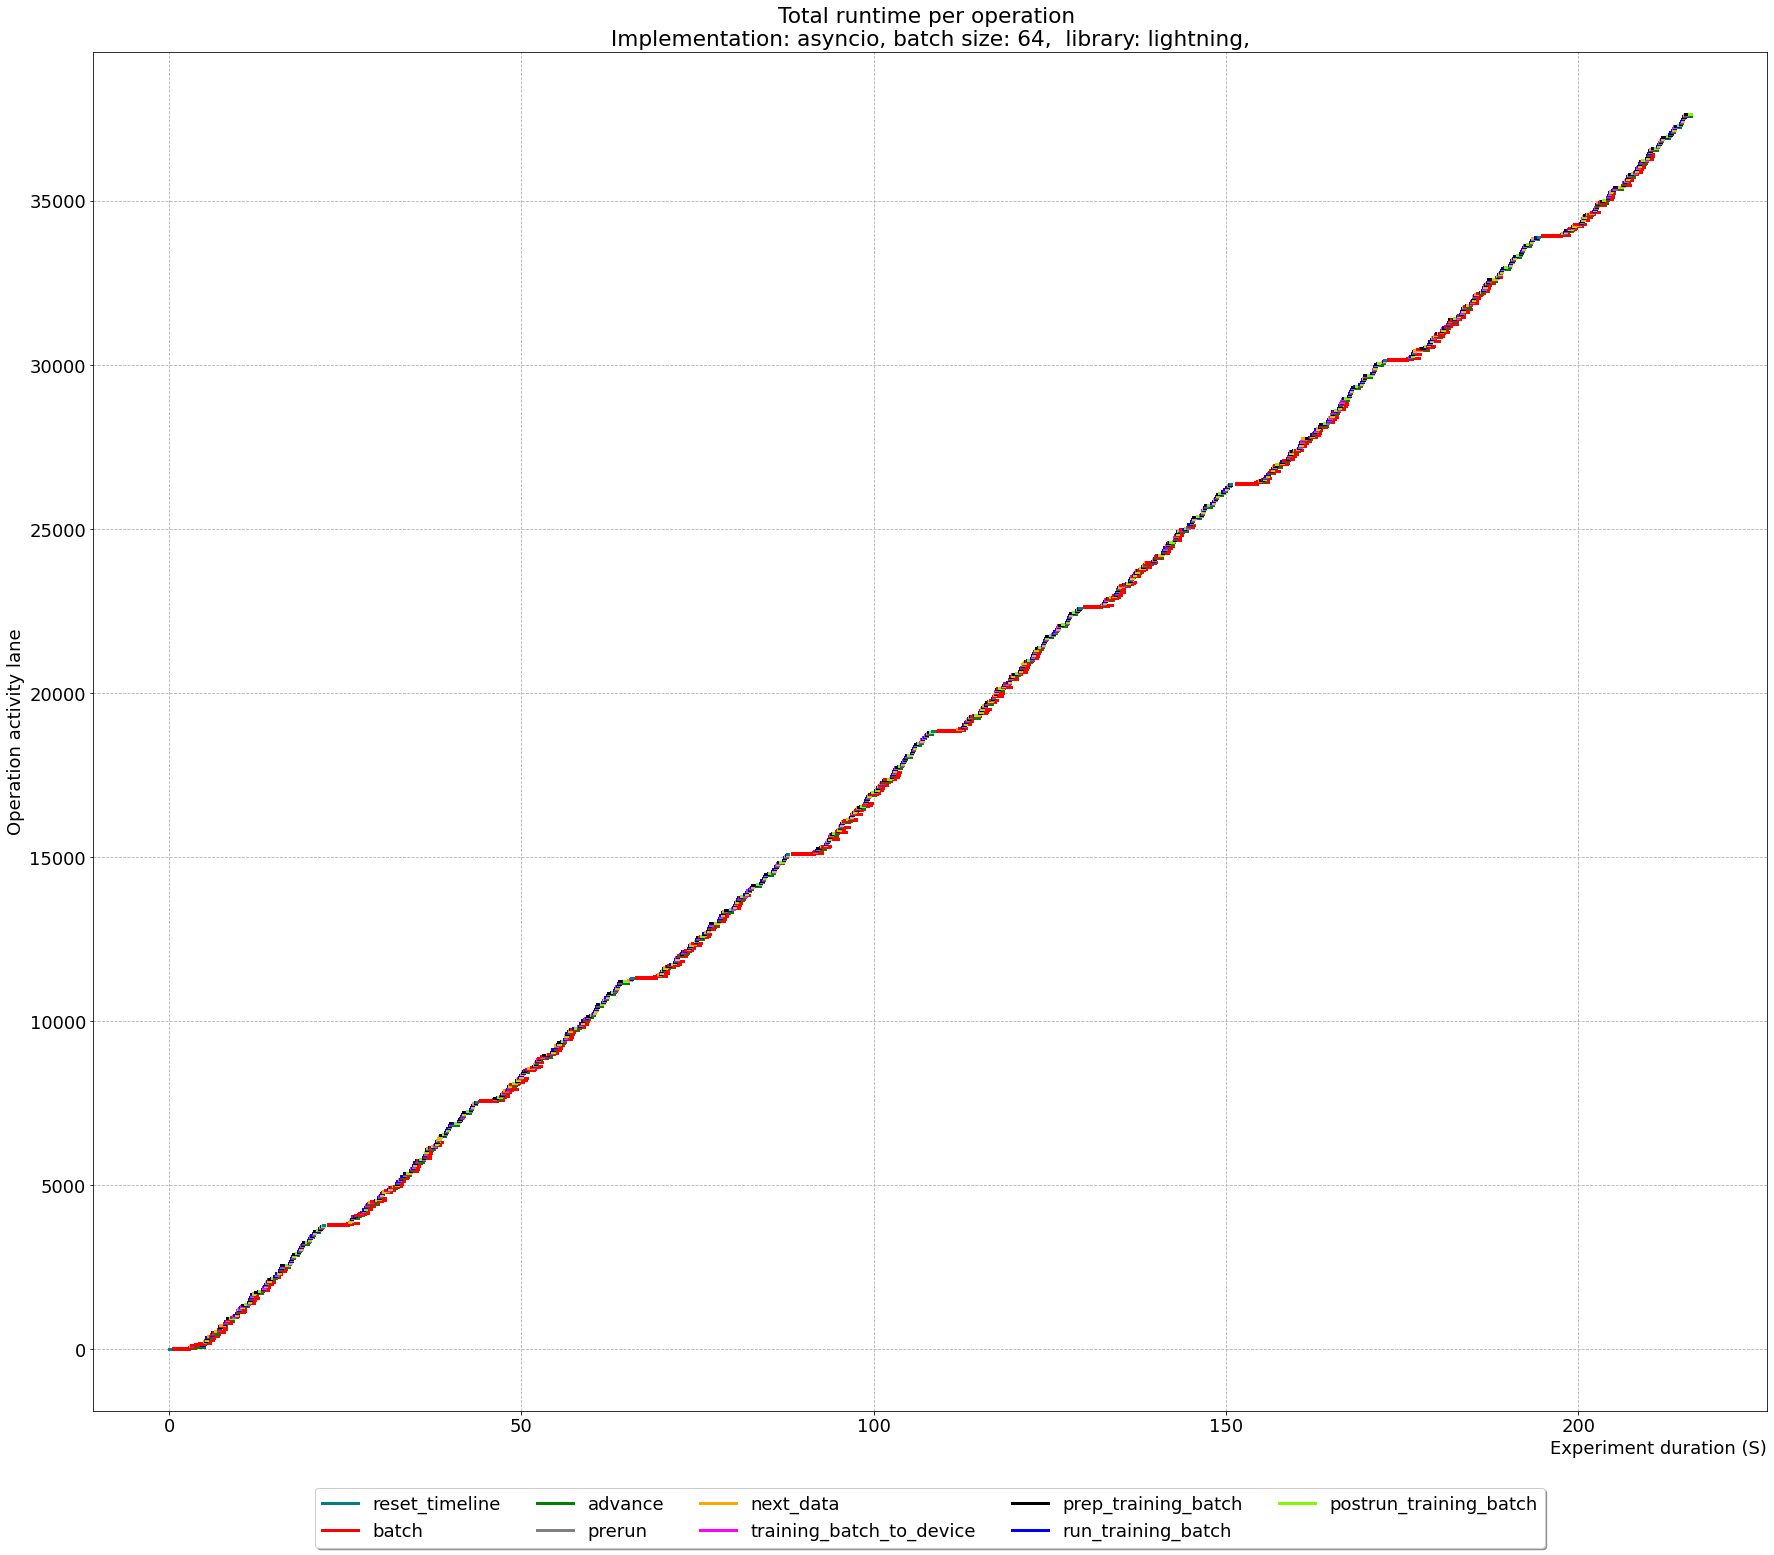

timestamp False


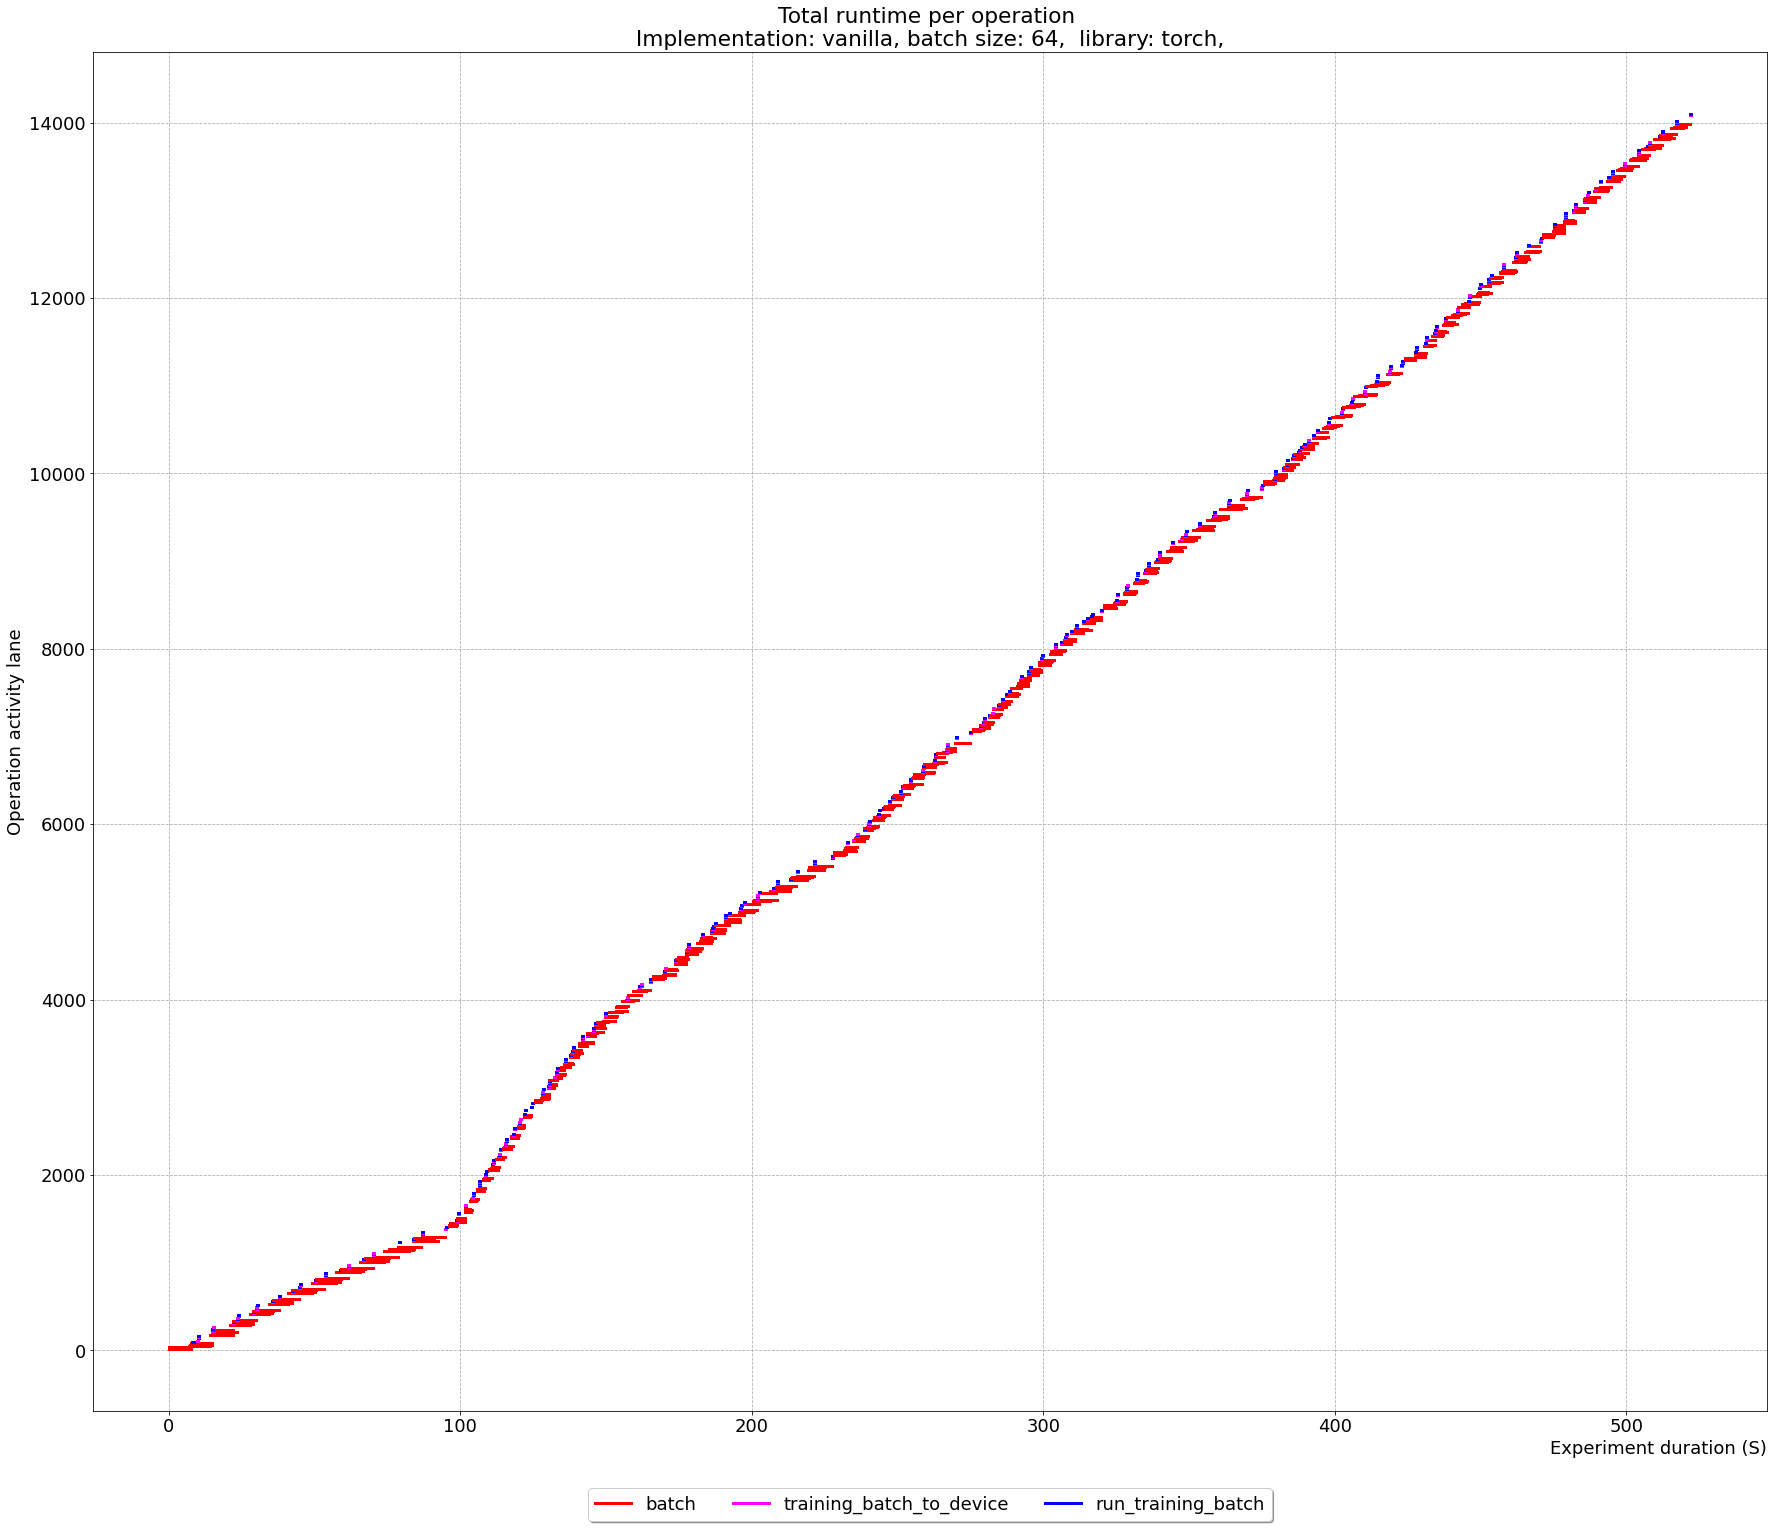

timestamp False


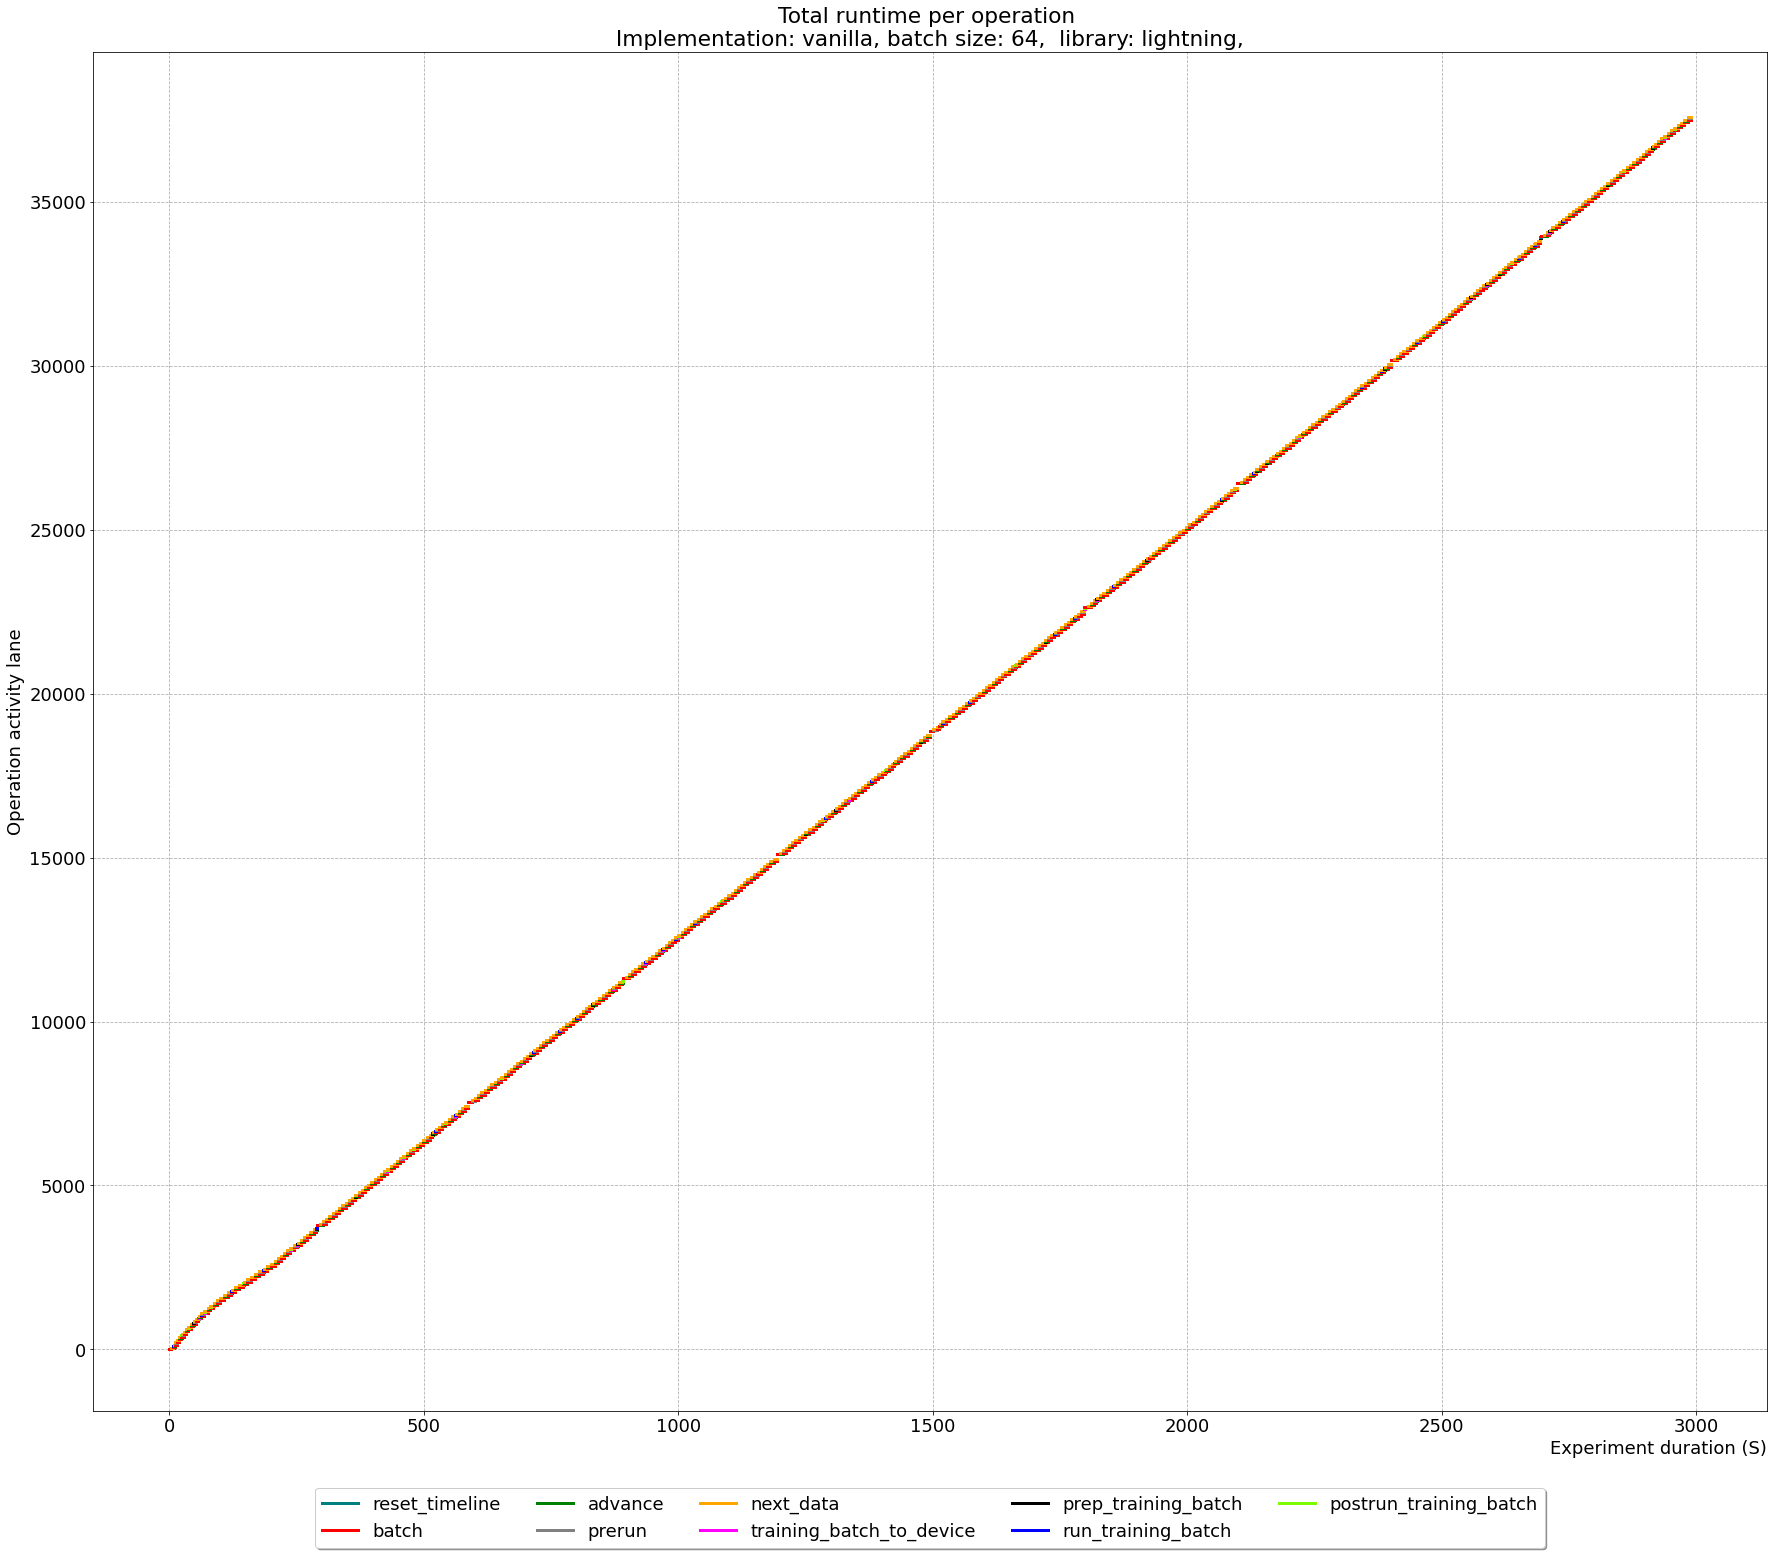

In [5]:
unique_runs_s3, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_s3)

for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False) 
    result = show_timelines_with_gpu(df, dfgpu, lanes, colors, run, False, False, False, 2, ms=False)
    result["run"]=run


timestamp False


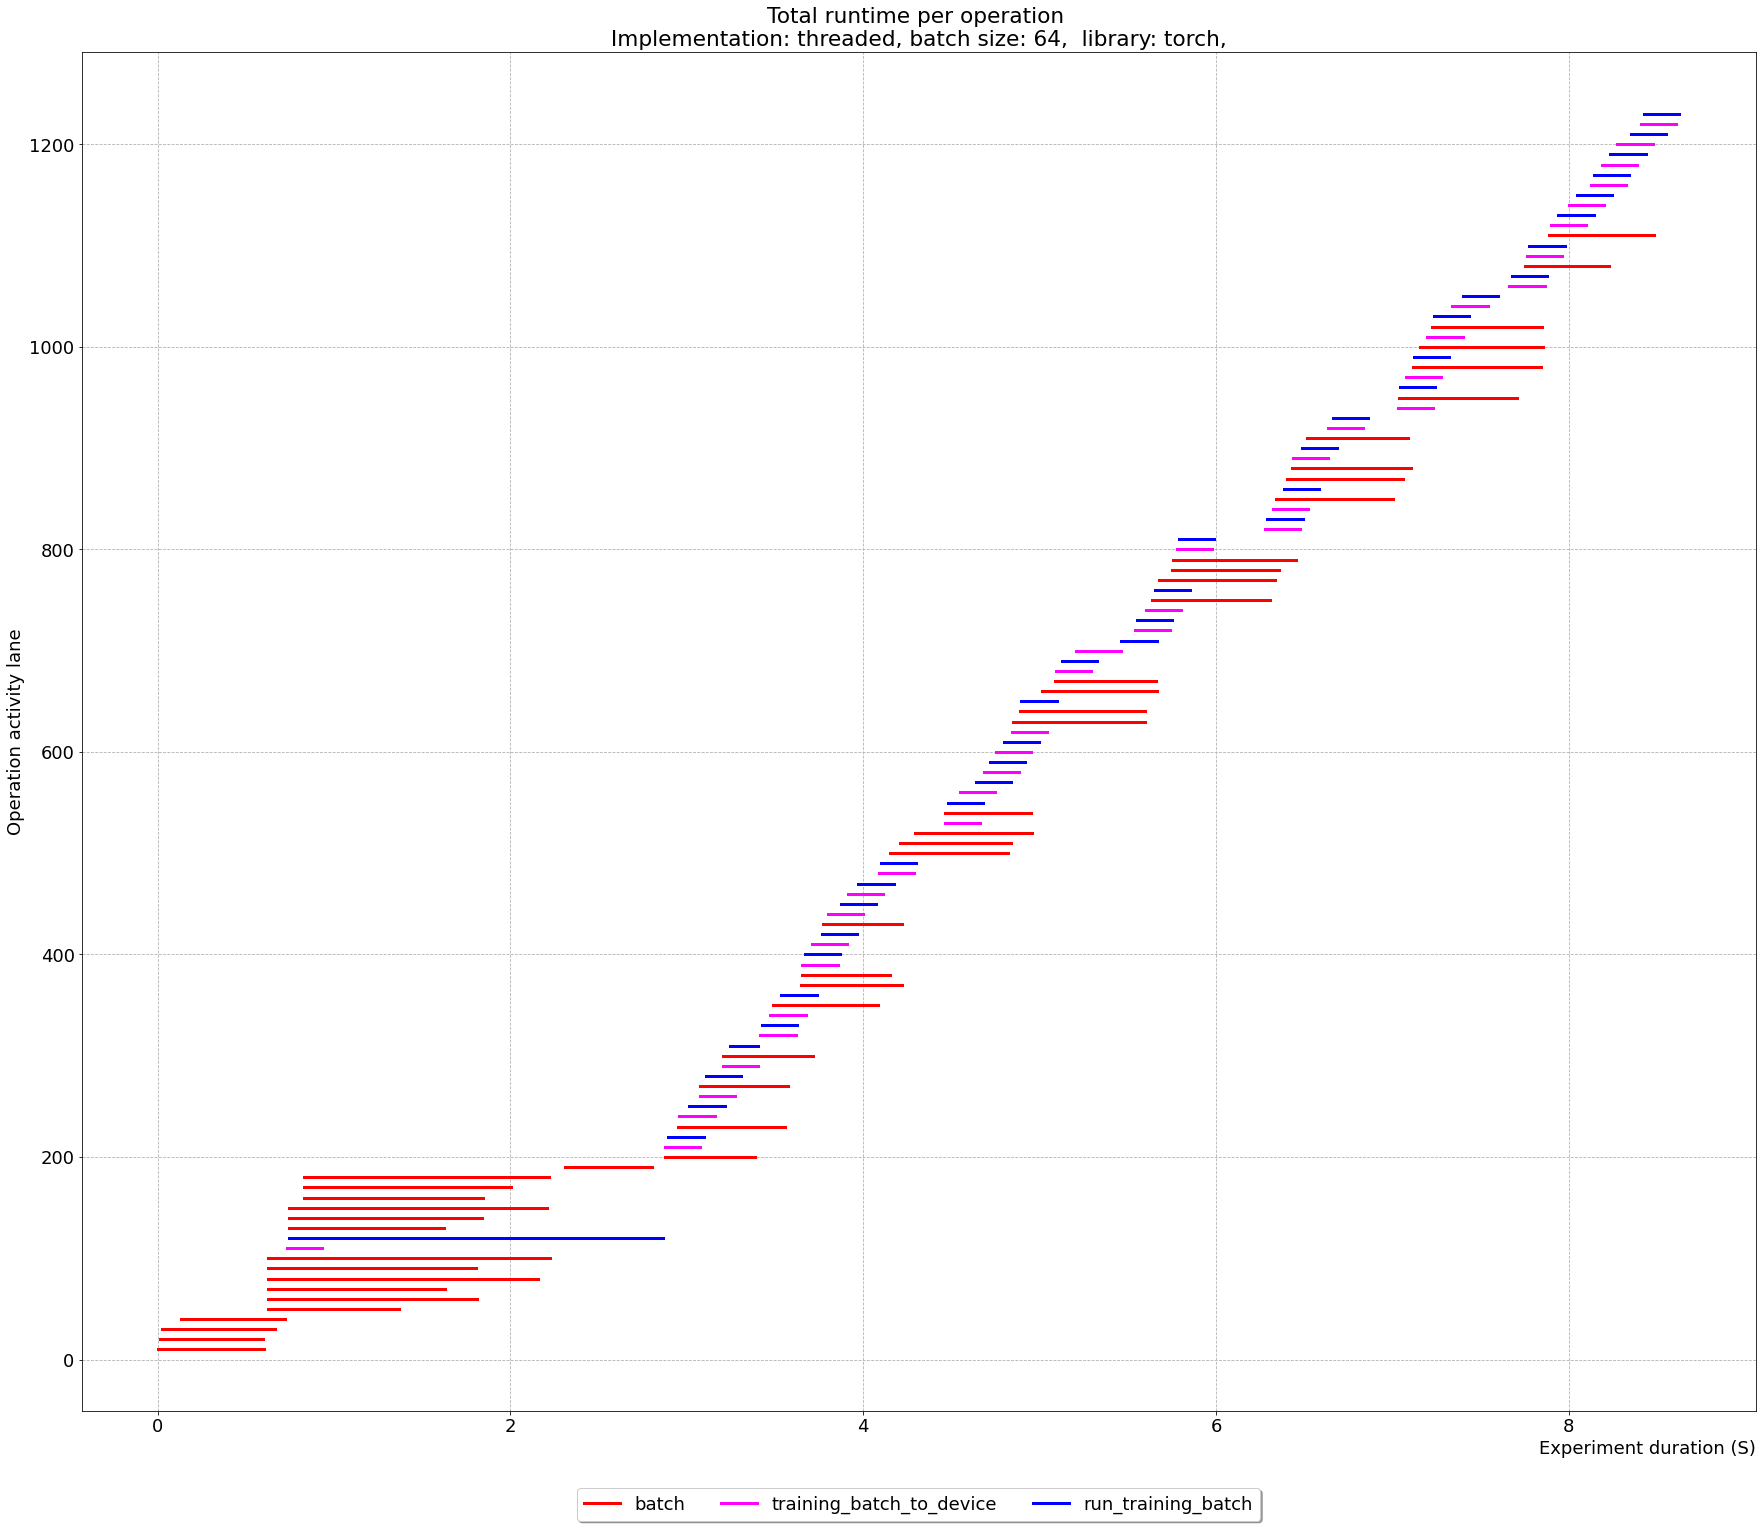

timestamp False


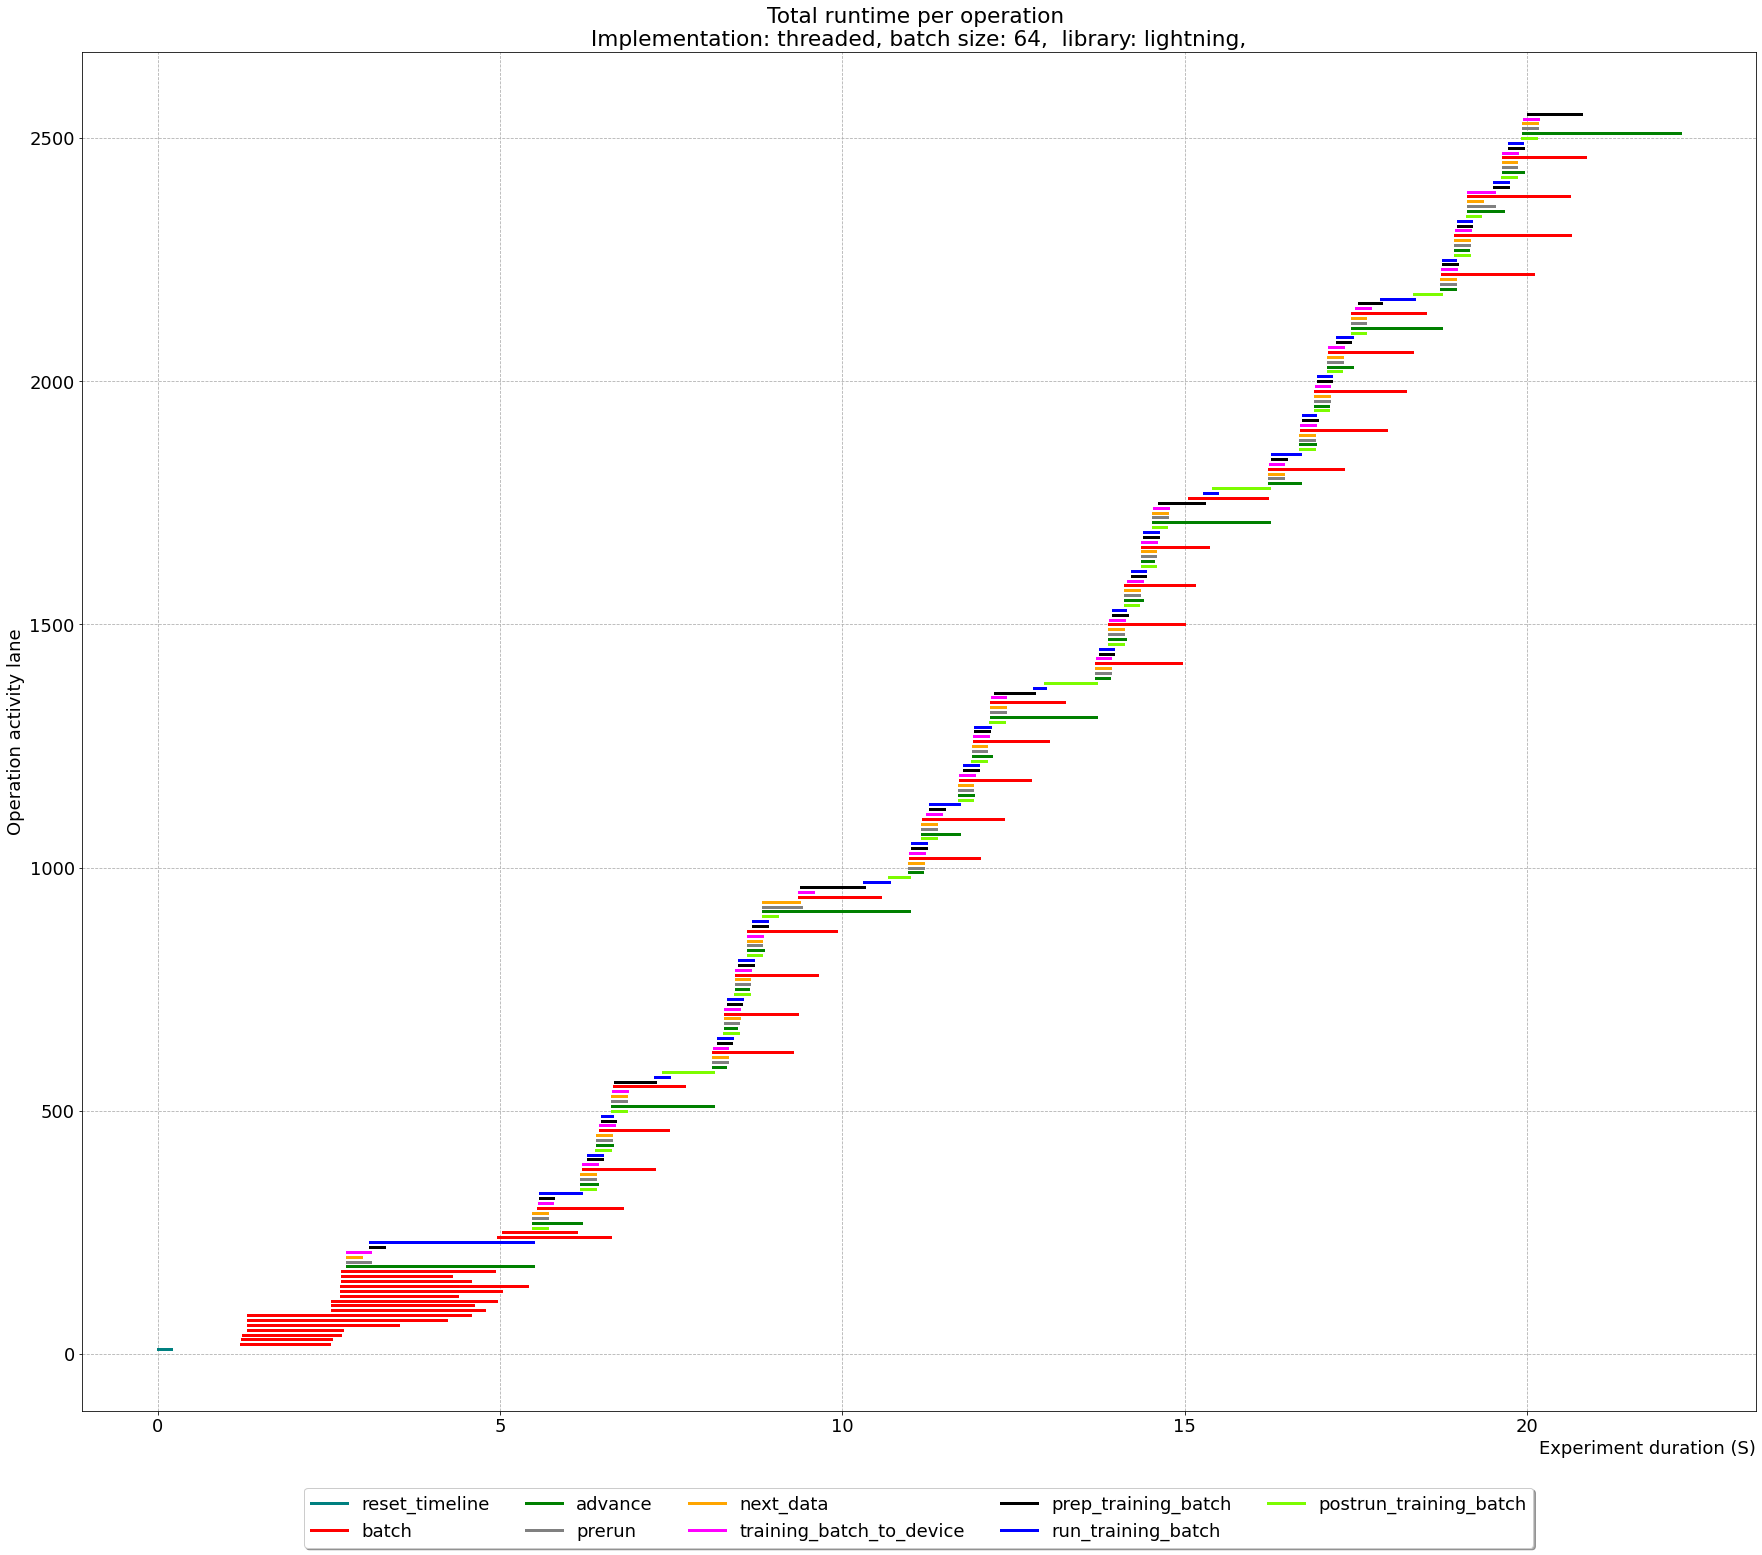

timestamp False


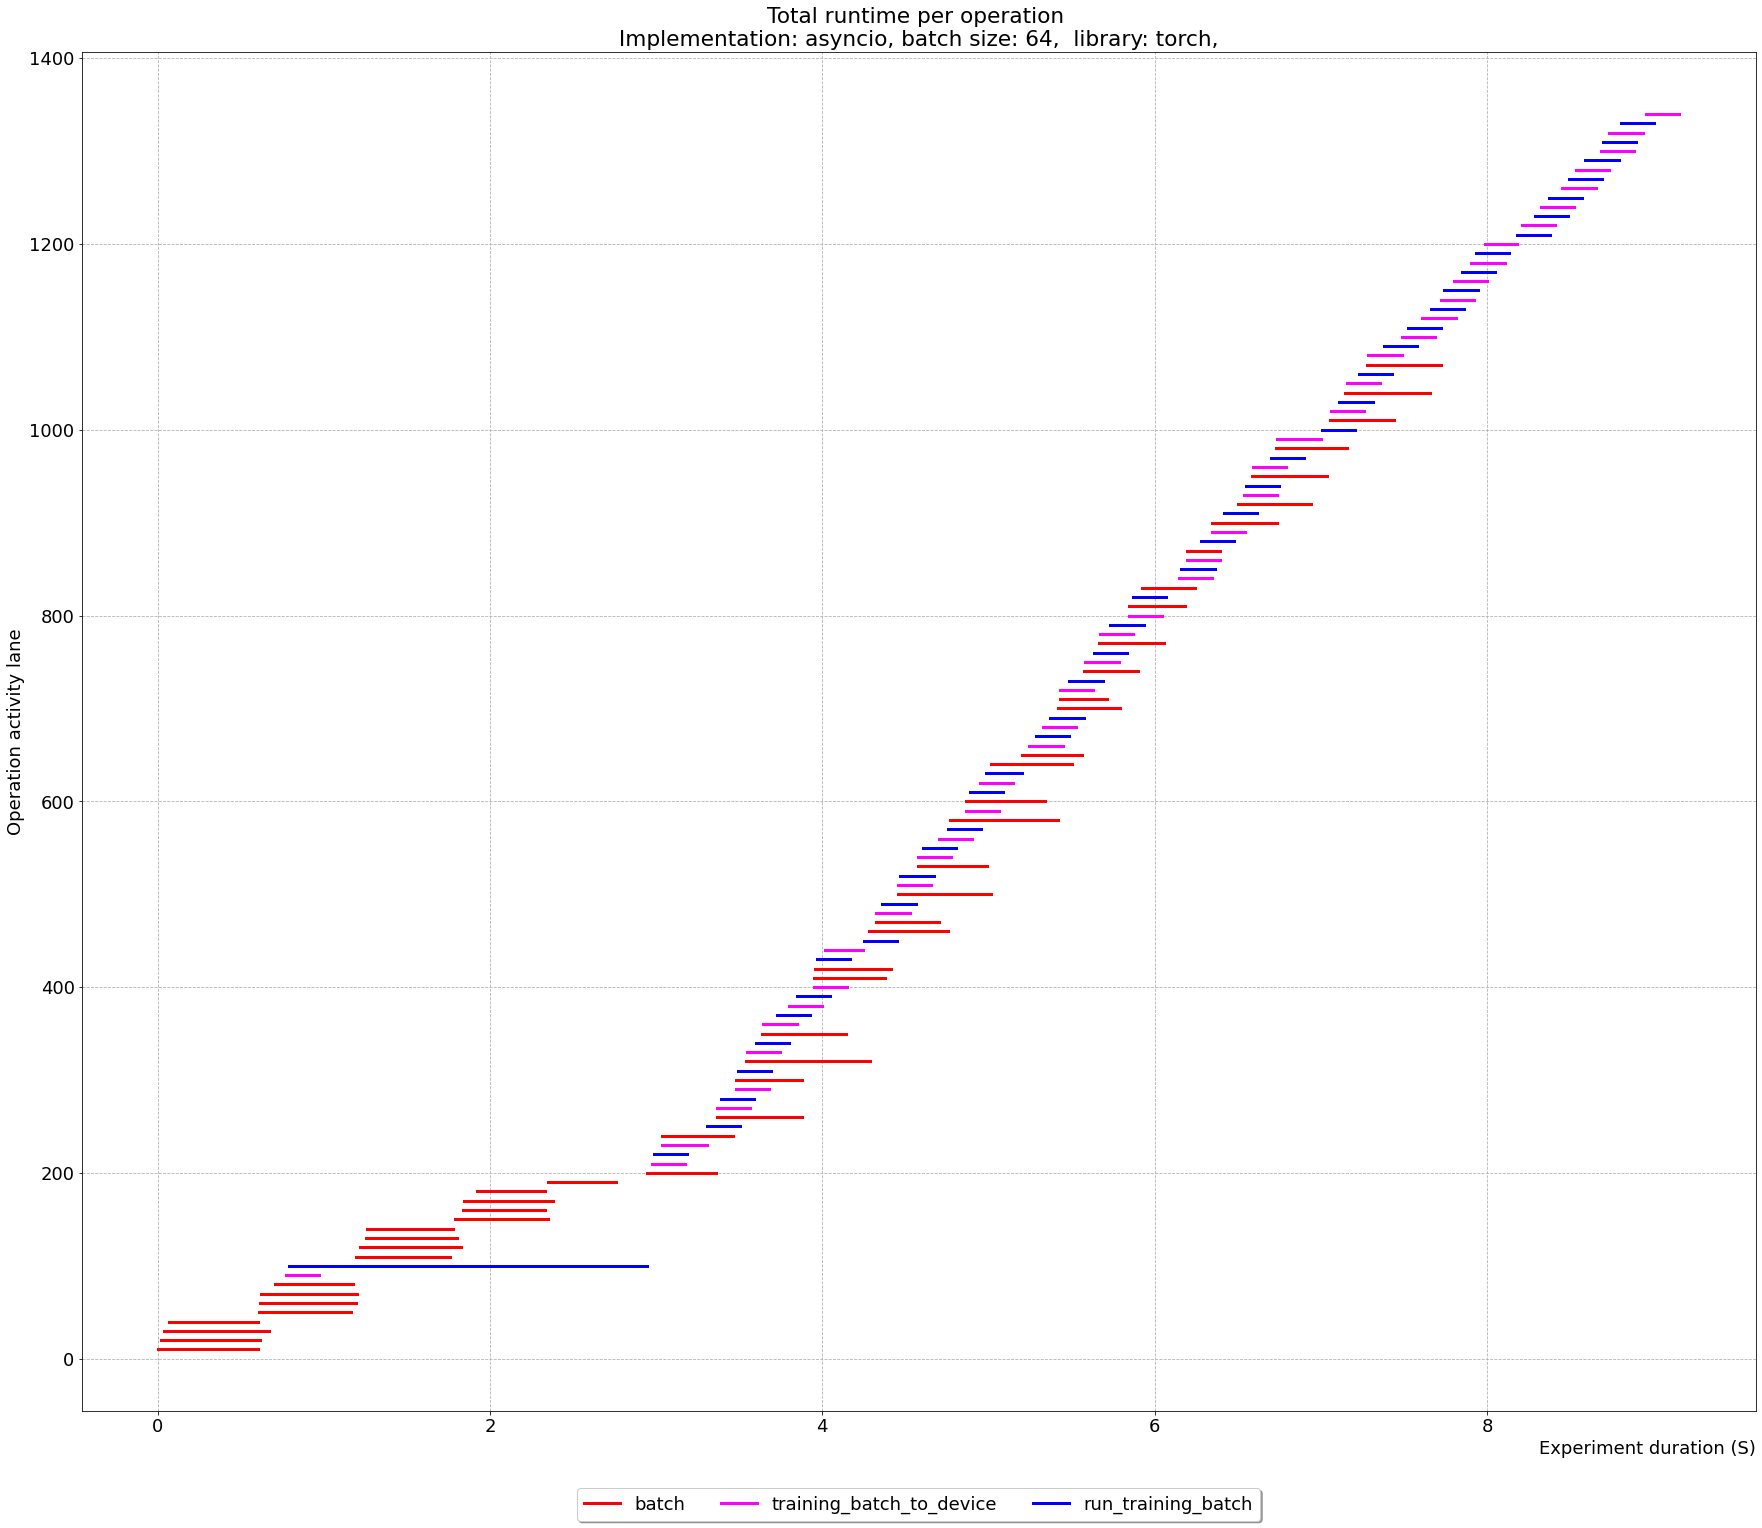

timestamp False


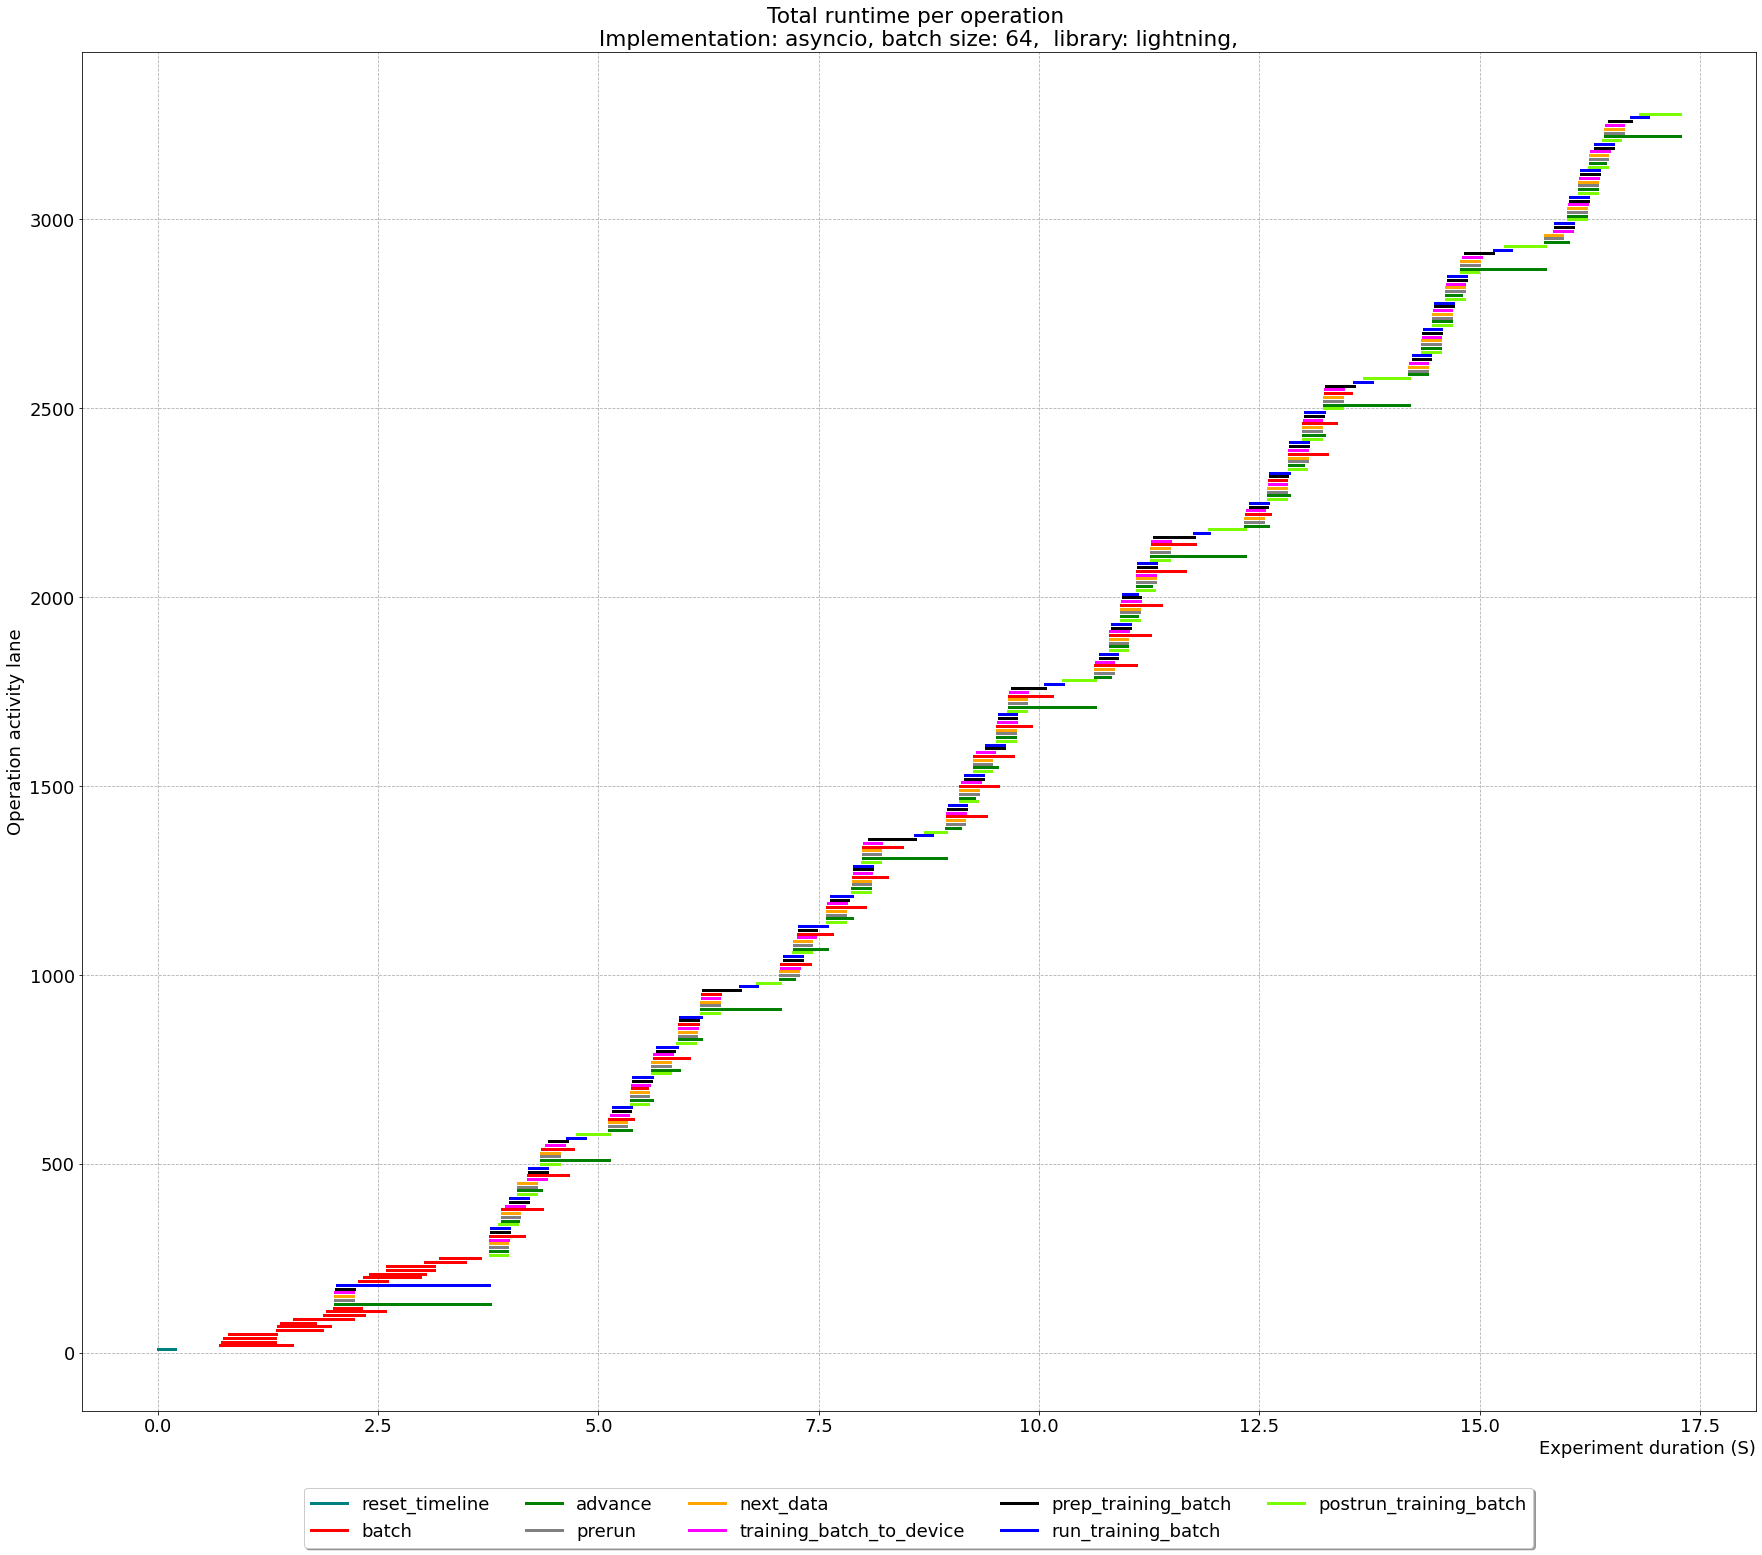

timestamp False


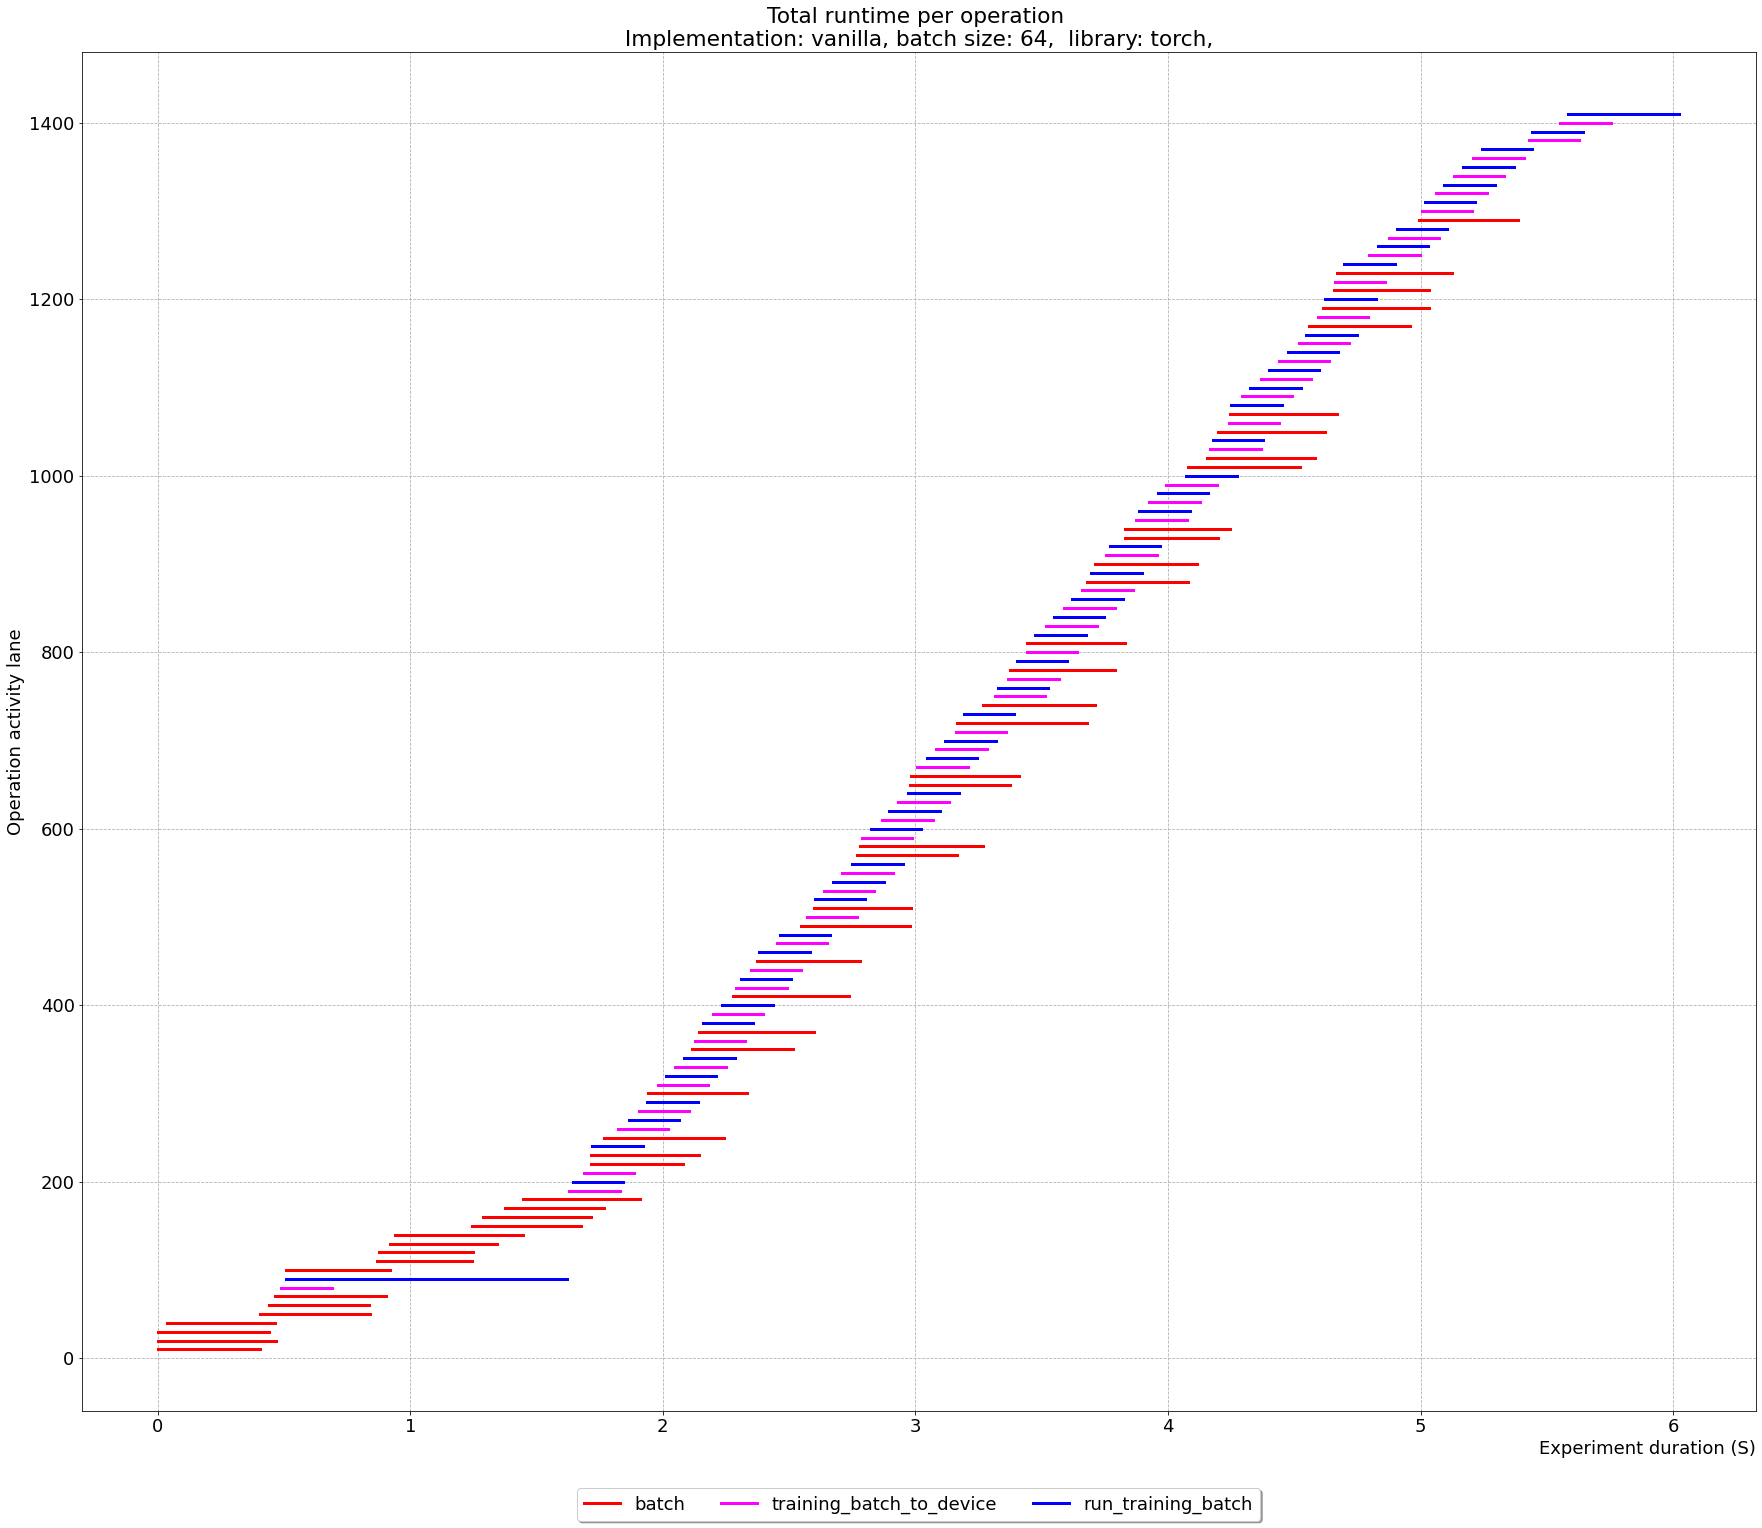

timestamp False


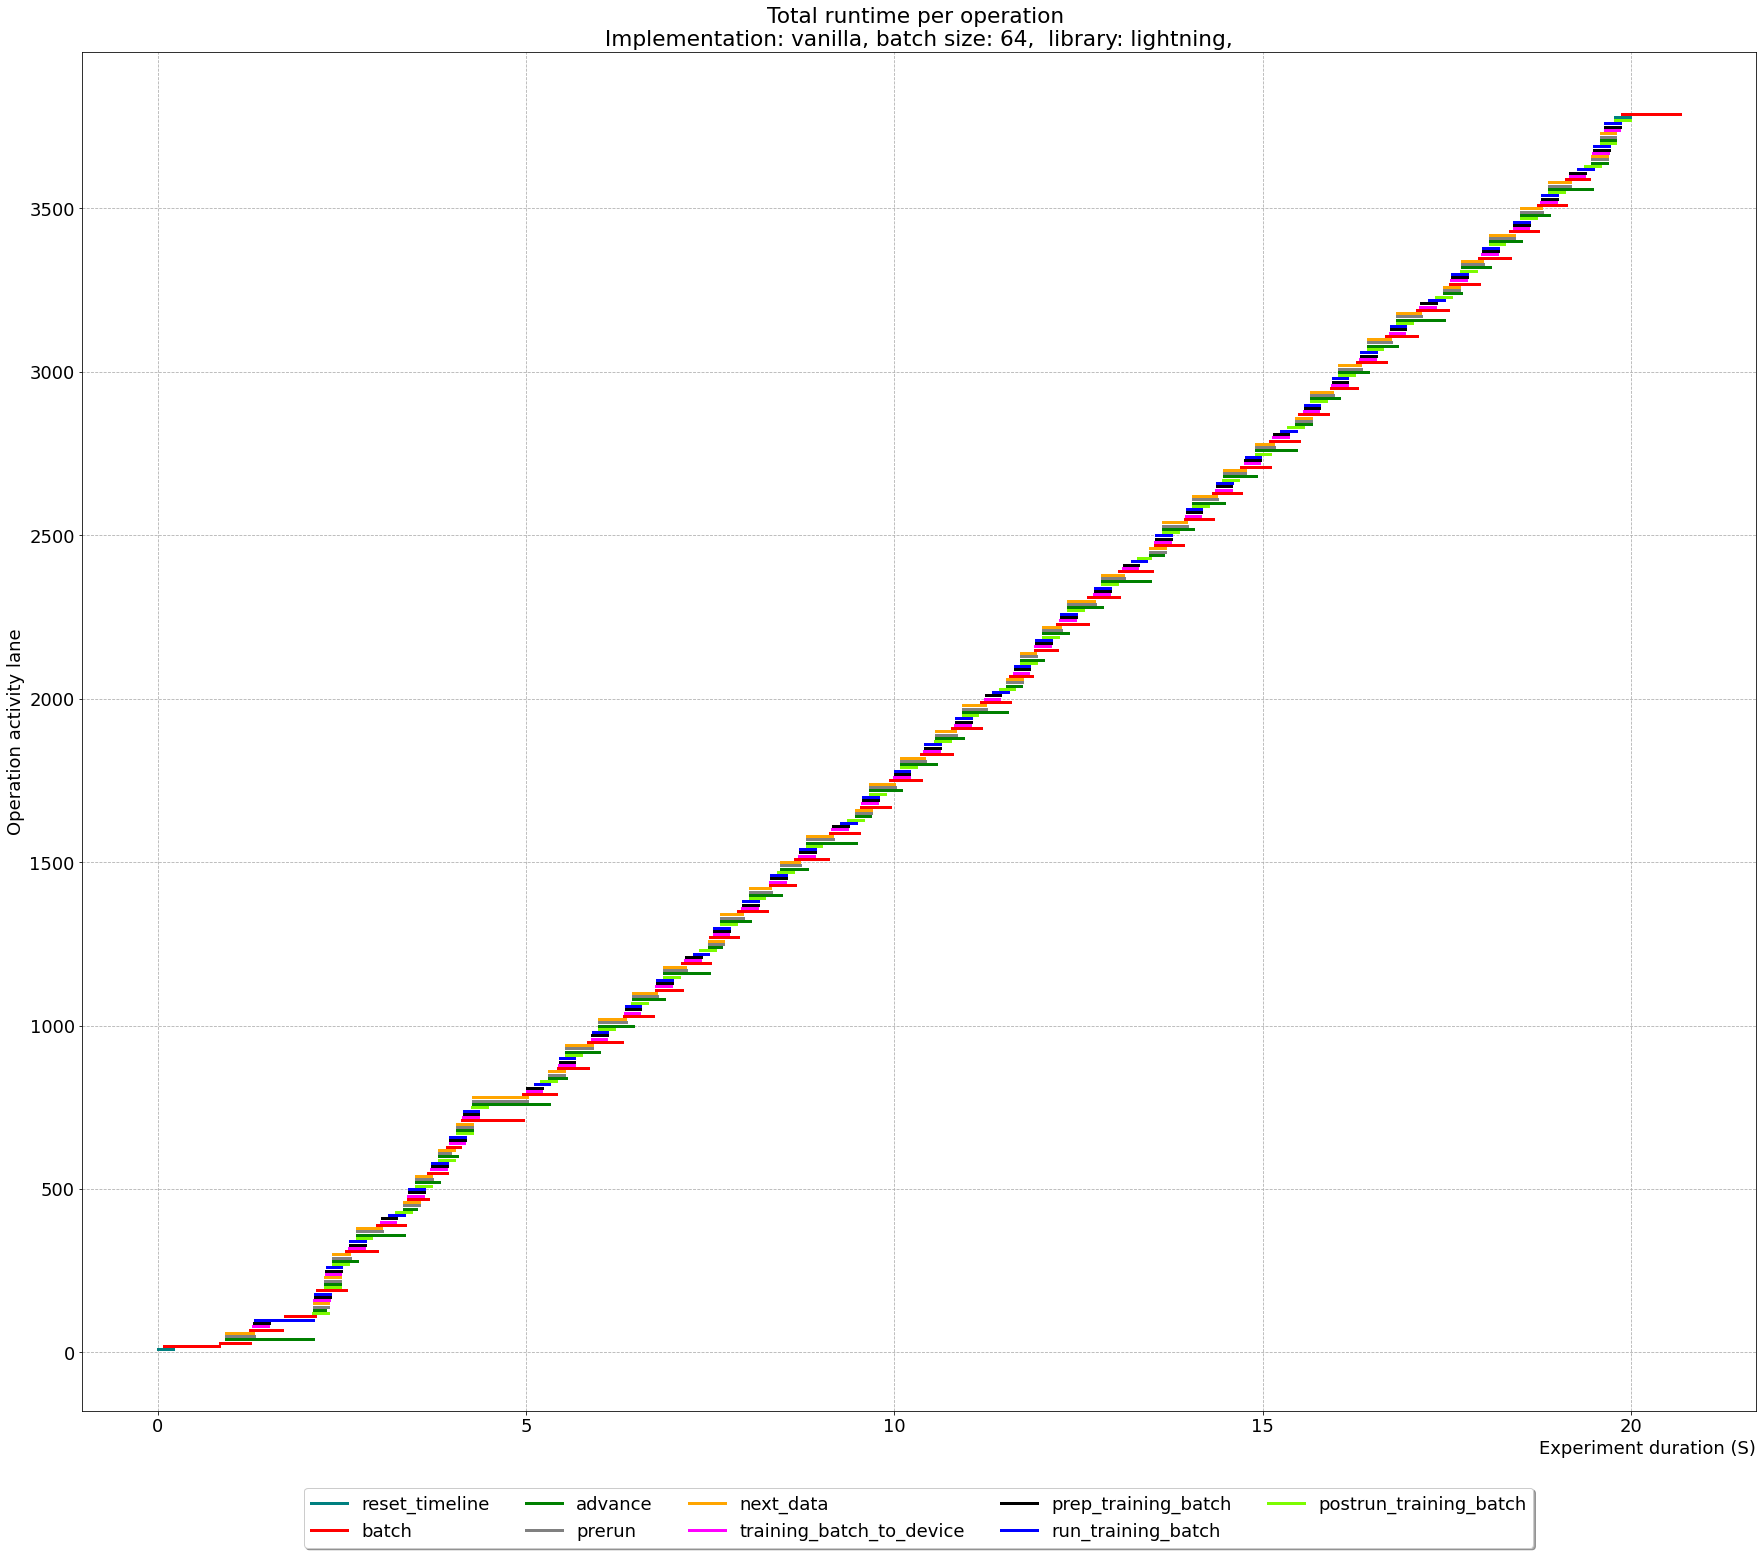

In [7]:
unique_runs_scratch, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_scratch)

for run in sorted(unique_runs_scratch):
    df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
    dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False)
    result = show_timelines_with_gpu(df, dfgpu, lanes, colors, run, False, False, True, 2, ms=False)
    result["run"]=run


#### Timeline plots 

Each line corresponds to a unique function call.

#### GPU utilization

In [9]:
unique_runs_s3 = np.unique(df_dataloader_s3["run"])
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])
print(unique_runs_s3, unique_runs_scratch)

['20220225f213212_benchmark_e2e_torch_s3_64_4_16_1_threaded_sync'
 '20220225f213426_benchmark_e2e_lightning_s3_64_4_16_1_threaded_sync'
 '20220225f214307_benchmark_e2e_torch_s3_64_4_16_1_asyncio_sync'
 '20220225f214554_benchmark_e2e_lightning_s3_64_4_16_1_asyncio_sync'
 '20220225f215437_benchmark_e2e_torch_s3_64_4_16_1_vanilla_sync'
 '20220225f220326_benchmark_e2e_lightning_s3_64_4_16_1_vanilla_sync'] ['20220225f213748_benchmark_e2e_torch_scratch_64_4_16_1_threaded_sync'
 '20220225f213920_benchmark_e2e_lightning_scratch_64_4_16_1_threaded_sync'
 '20220225f214952_benchmark_e2e_torch_scratch_64_4_16_1_asyncio_sync'
 '20220225f215129_benchmark_e2e_lightning_scratch_64_4_16_1_asyncio_sync'
 '20220225f225330_benchmark_e2e_torch_scratch_64_4_16_1_vanilla_sync'
 '20220225f225434_benchmark_e2e_lightning_scratch_64_4_16_1_vanilla_sync']


timestamp False
40.320388349514566 23.666666666666668


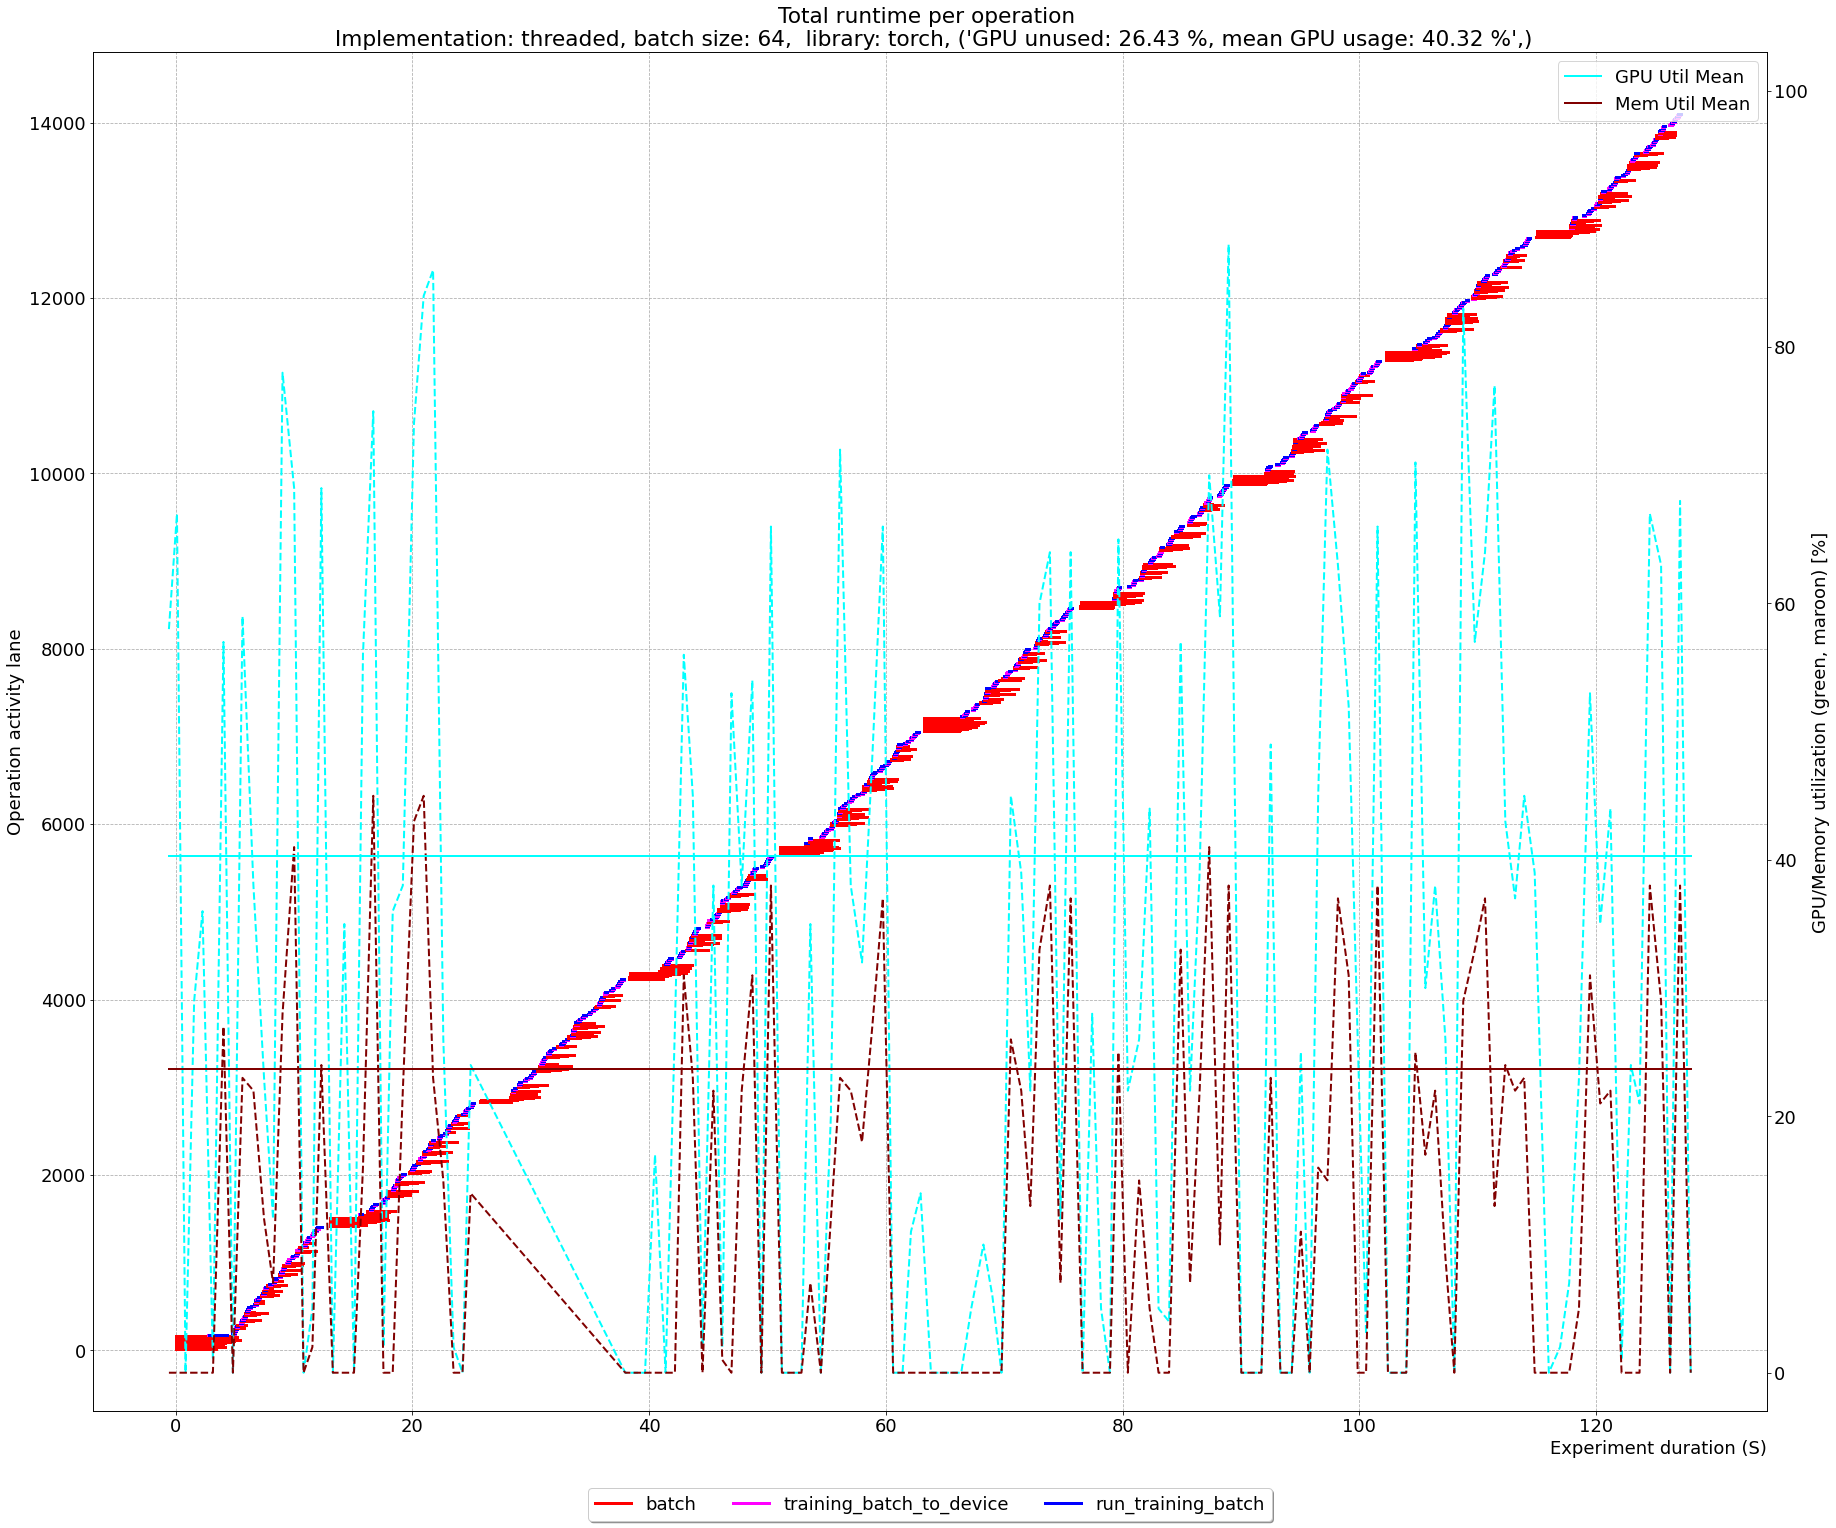

timestamp False
40.0990990990991 11.08108108108108


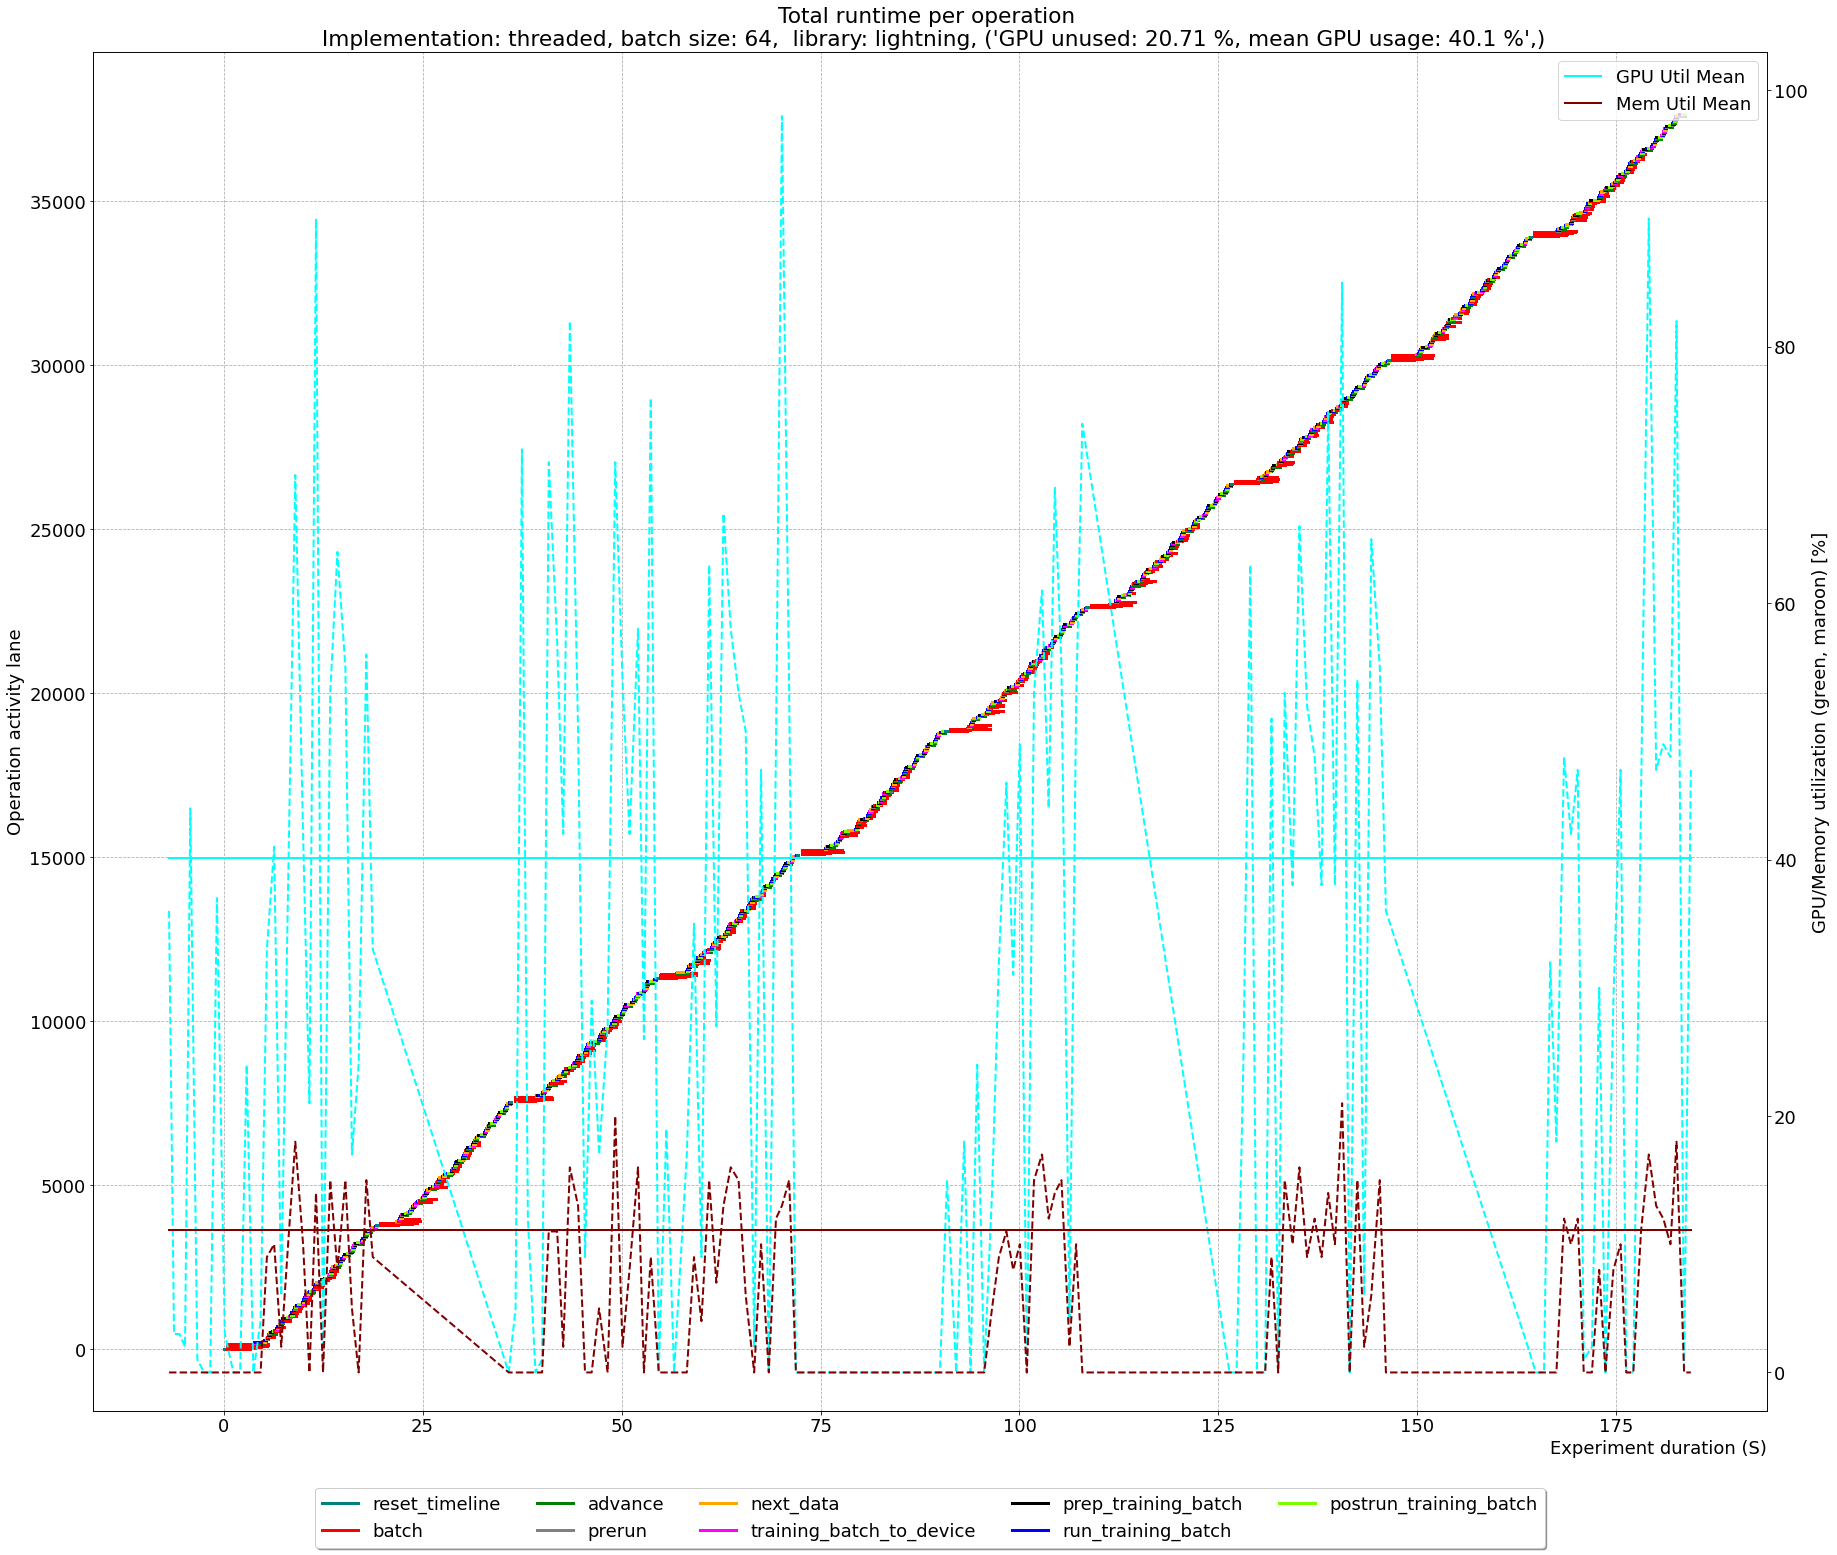

timestamp False
52.11 16.6056338028169


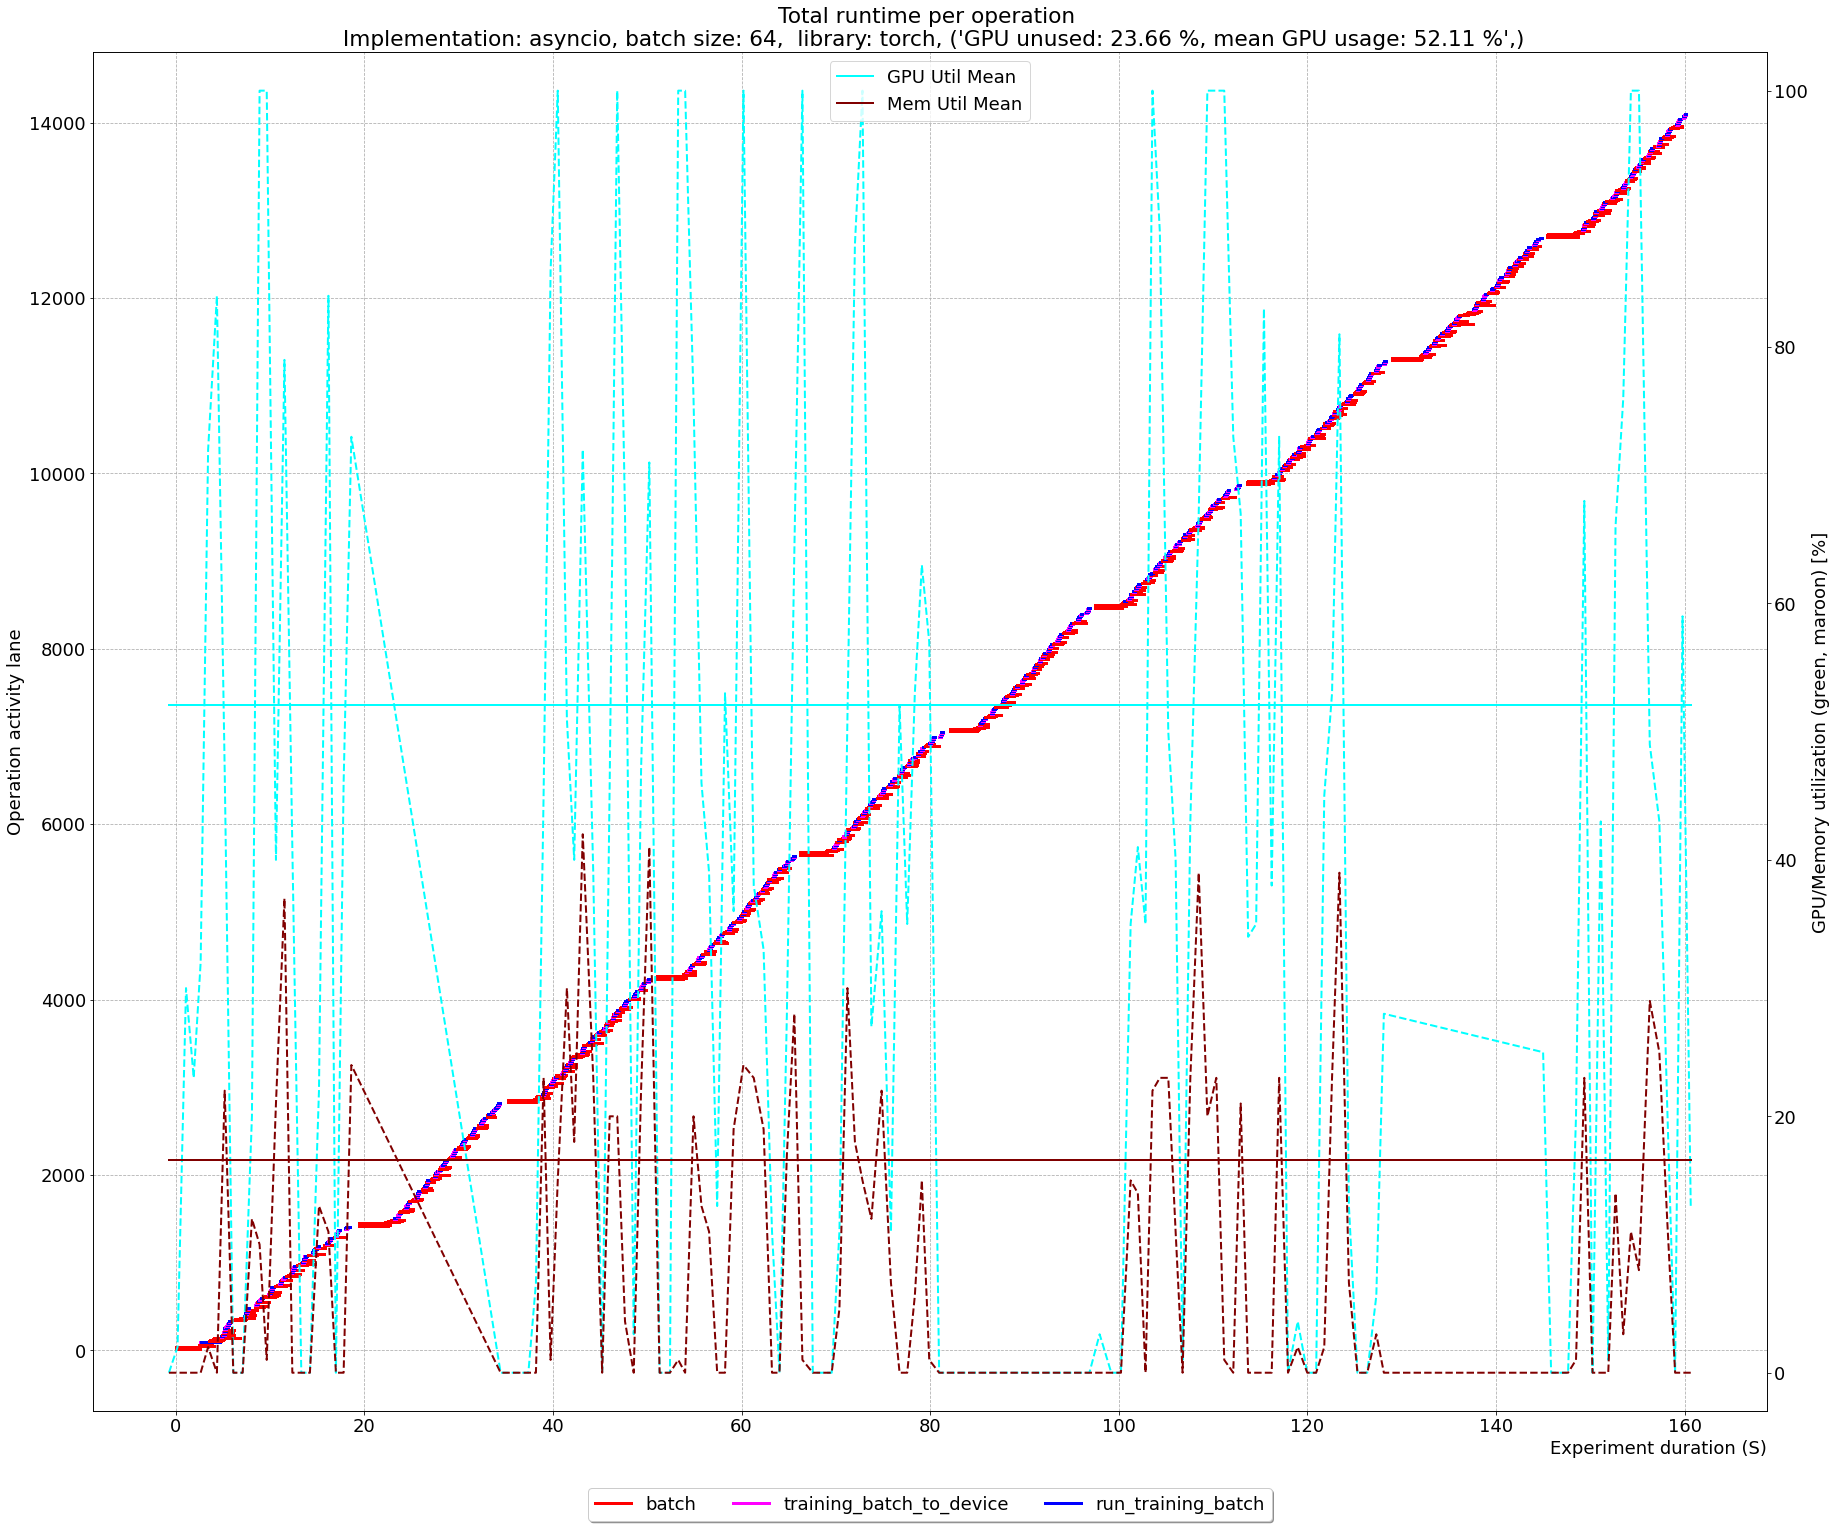

timestamp False
53.046052631578945 9.474576271186441


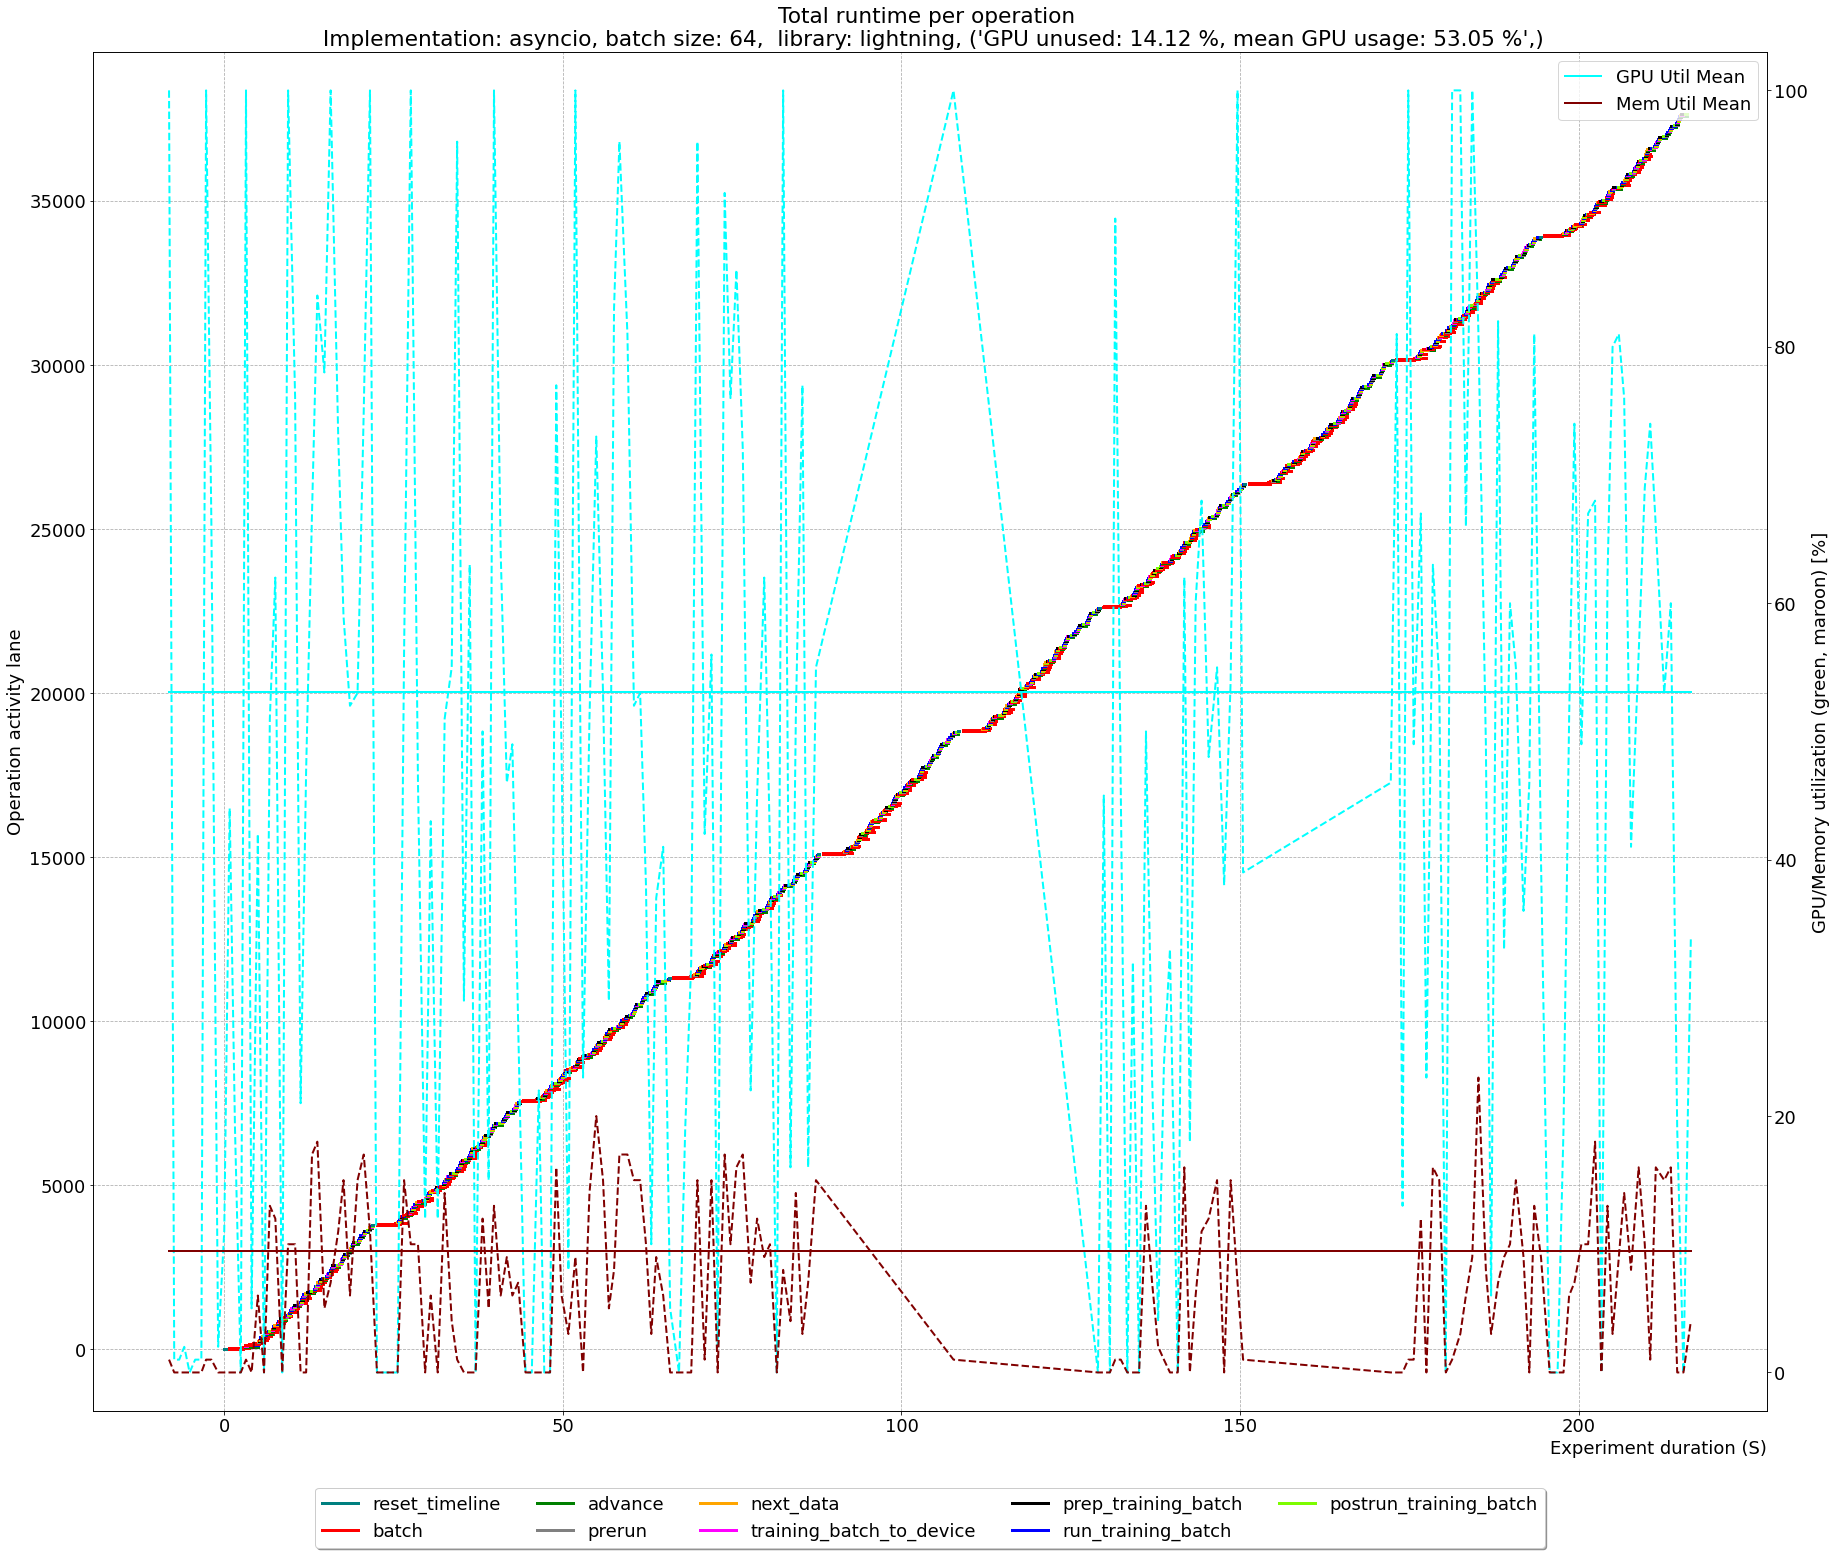

timestamp False
58.13333333333333 12.0


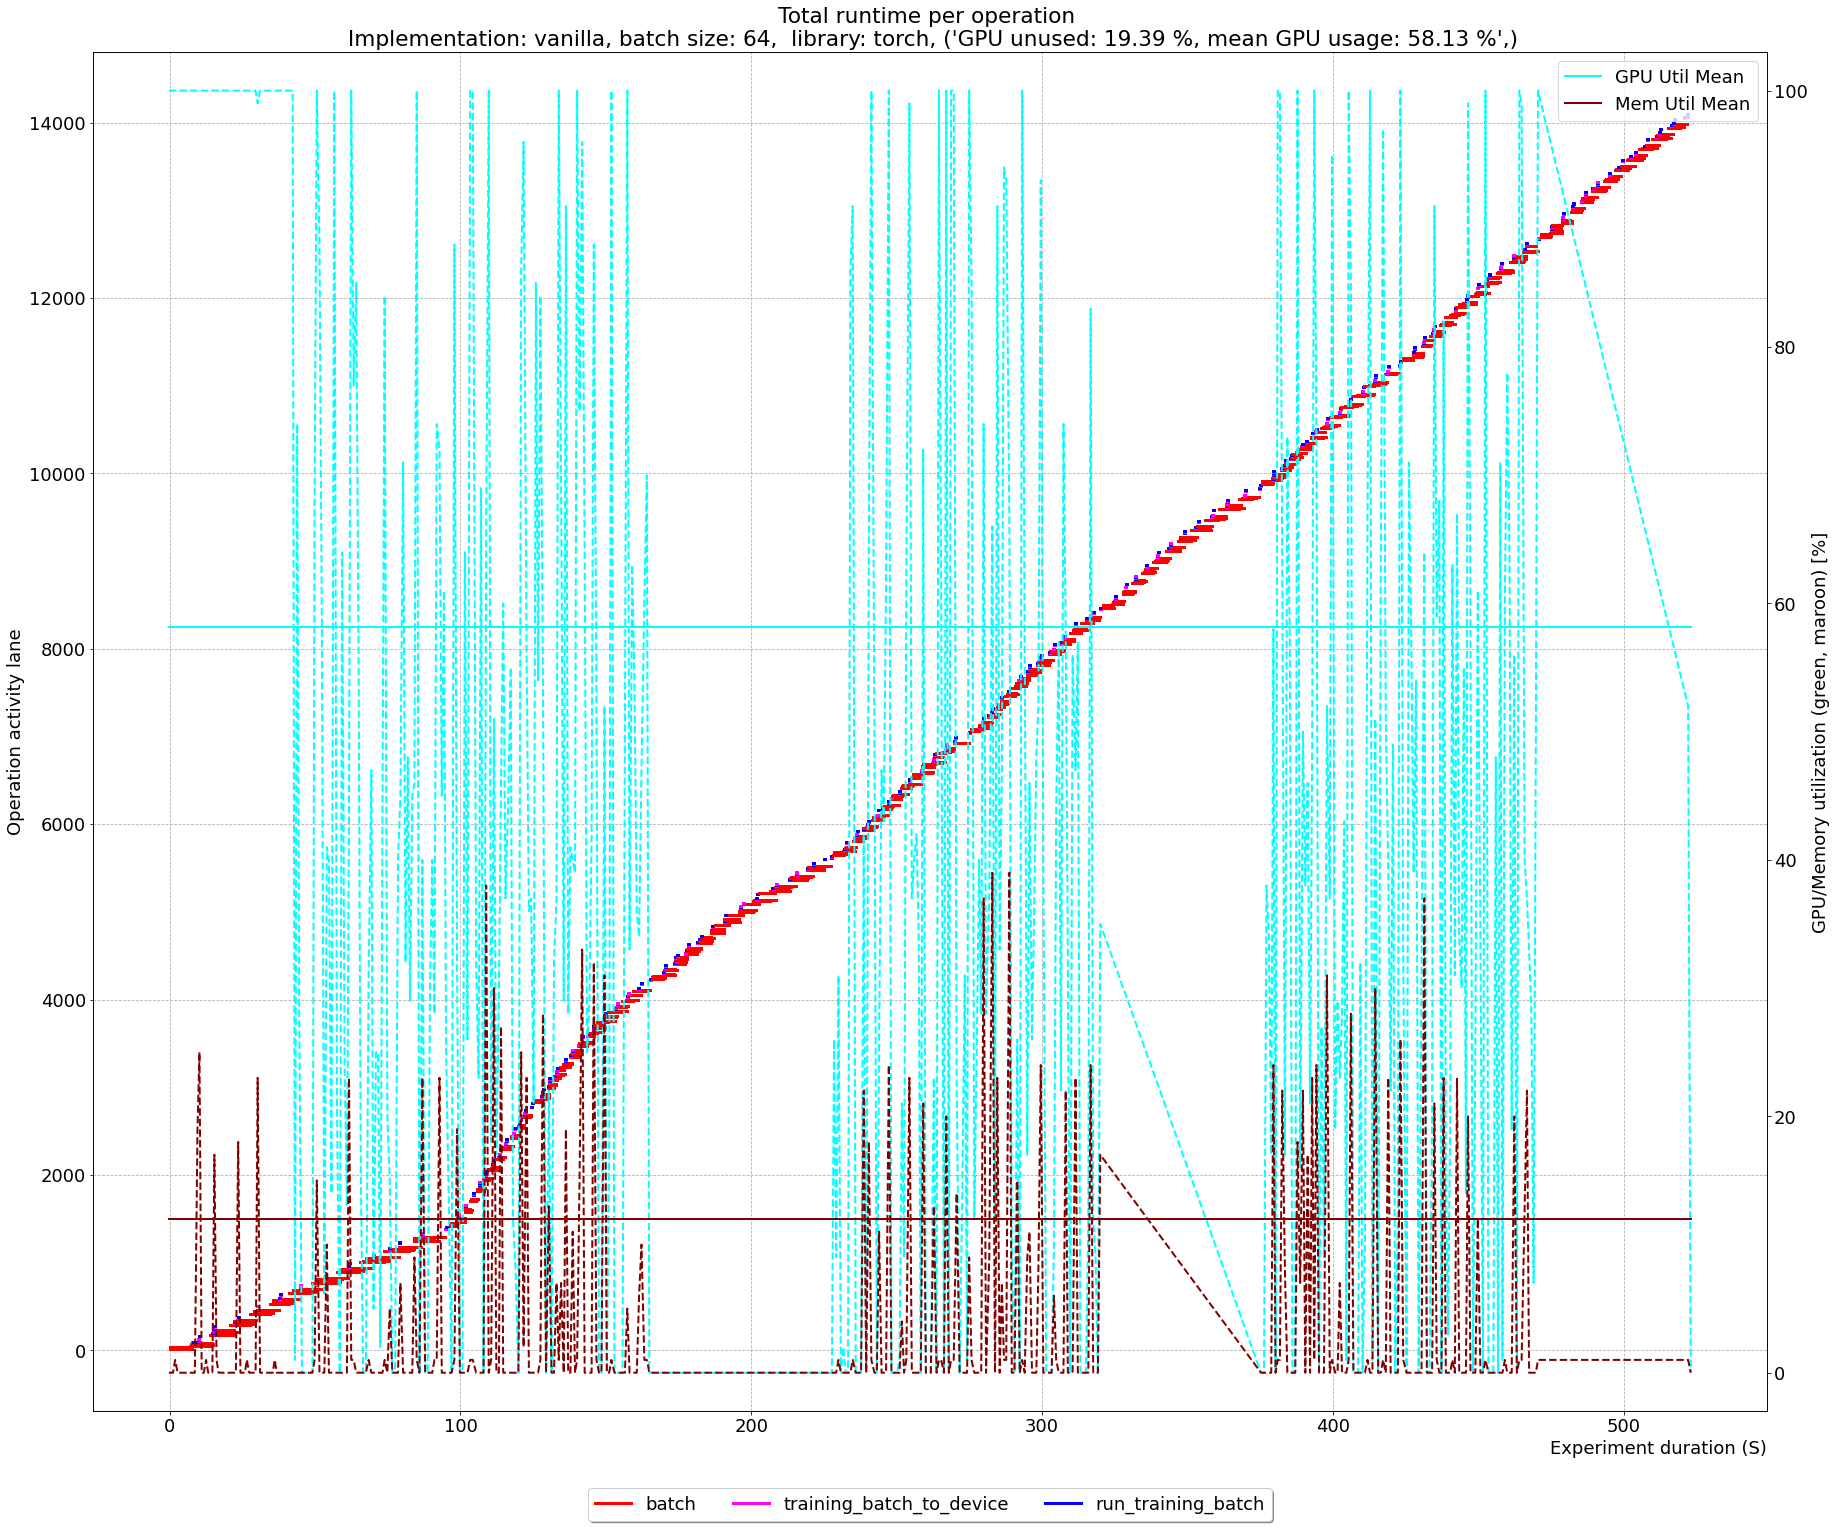

timestamp False
41.640957446808514 7.5021645021645025


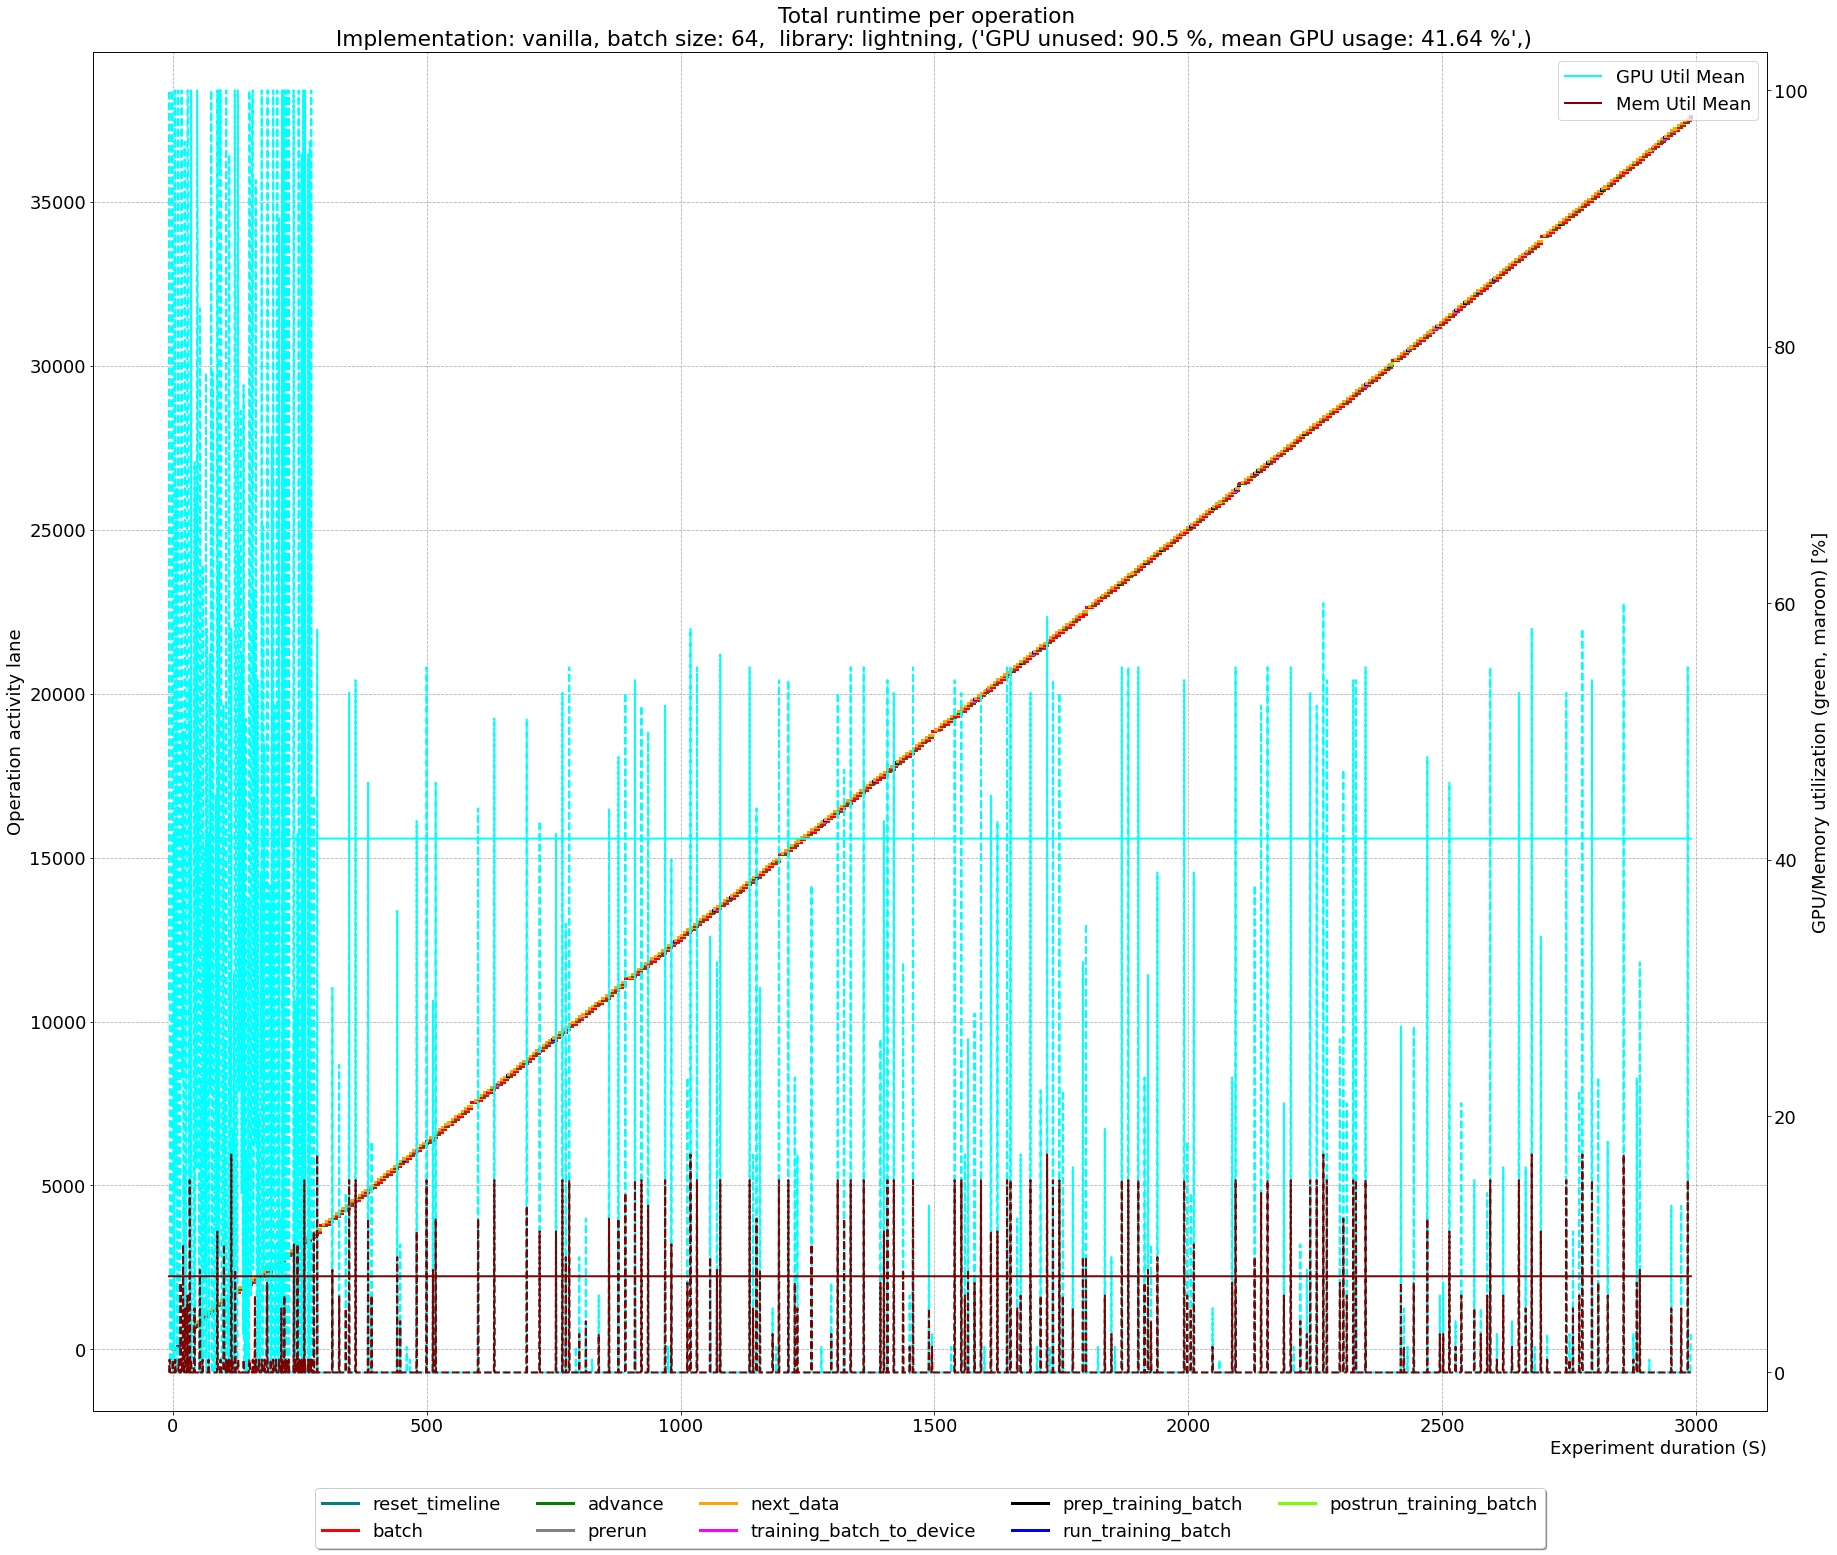

In [10]:
unique_runs_s3, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_s3)
returns_s3 = []

for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False) 
    result = show_timelines_with_gpu(df=df, gpu_util=dfgpu, lanes=lanes, colors=colors, run=run, 
                                     flat=False, show_gpu=True, zoom=False, zoom_epochs=2,
                                     skip_plot=False, ms=False)
    result["run"]=run
    returns_s3.append(result)

timestamp False
53.7 27.955555555555556


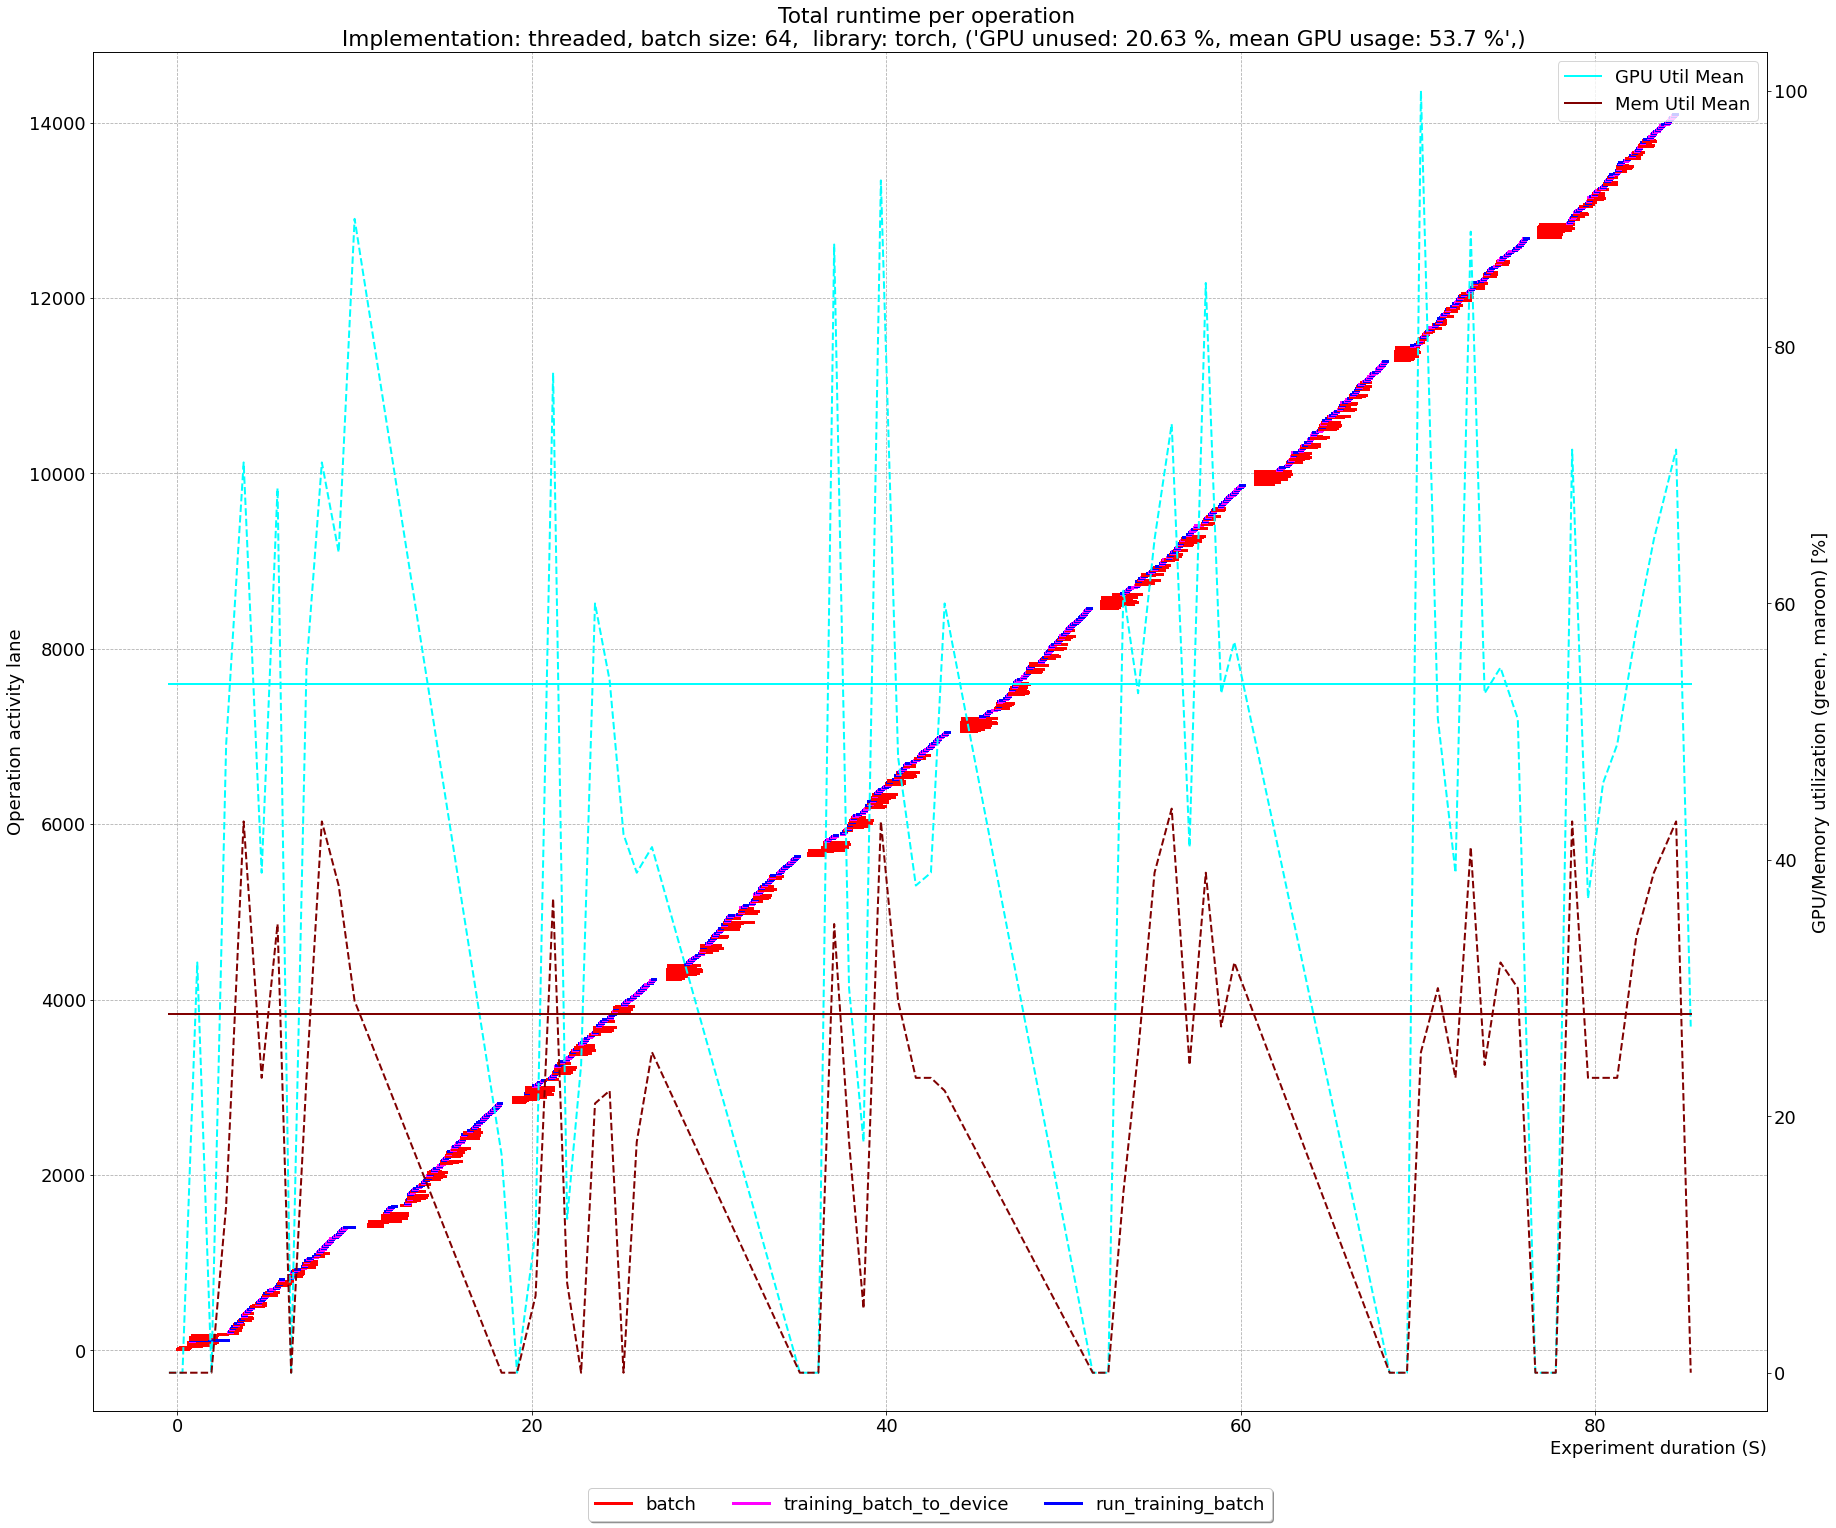

timestamp False
44.75581395348837 9.440677966101696


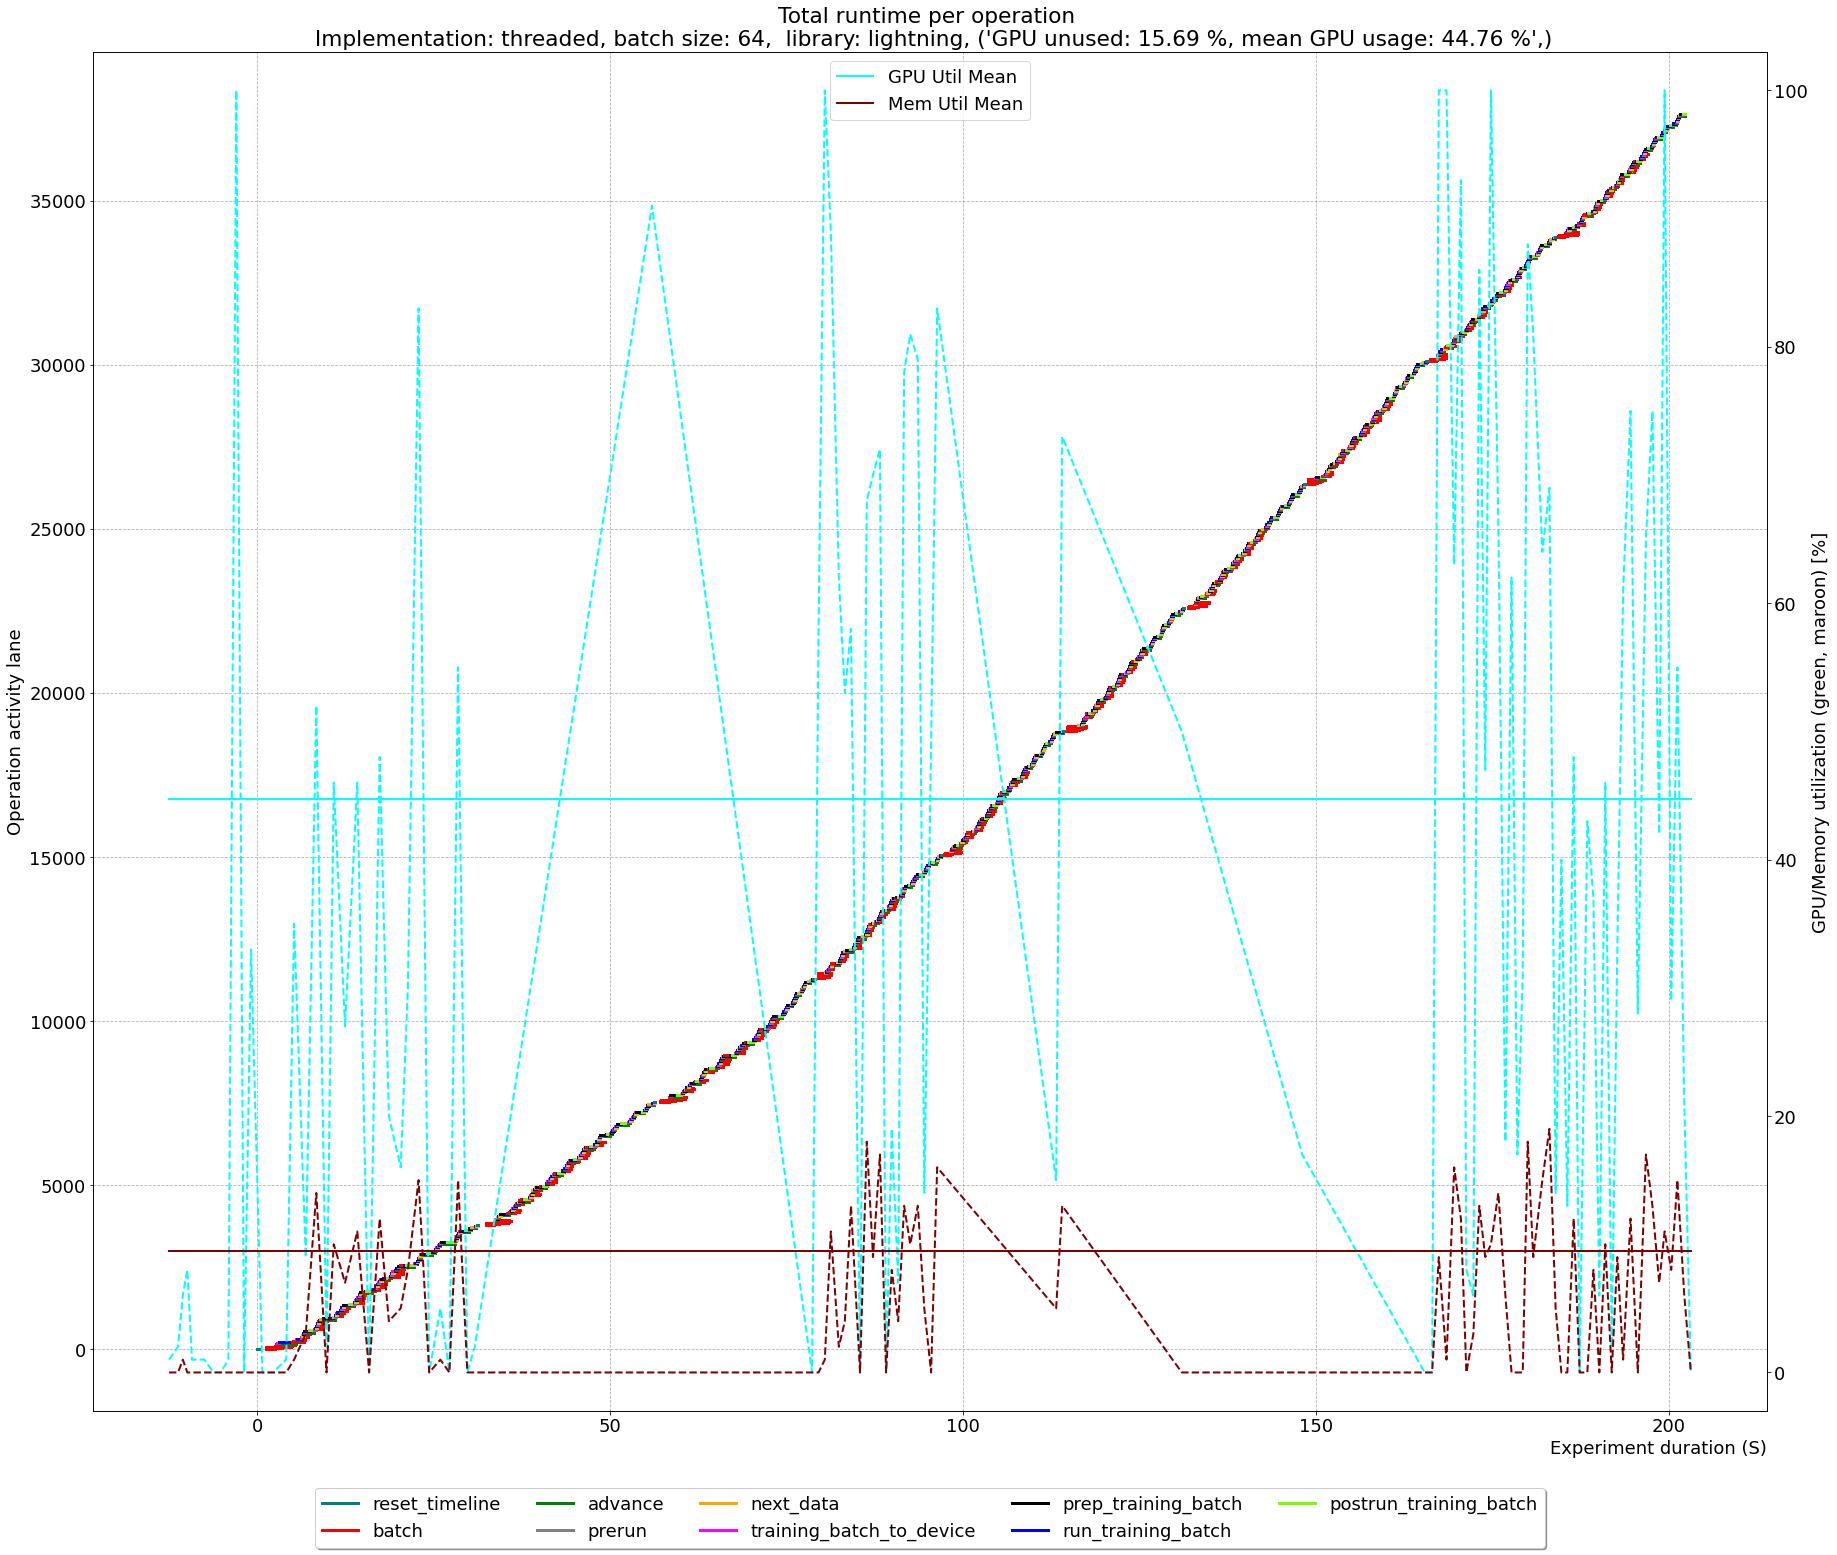

timestamp False
57.642857142857146 21.698630136986303


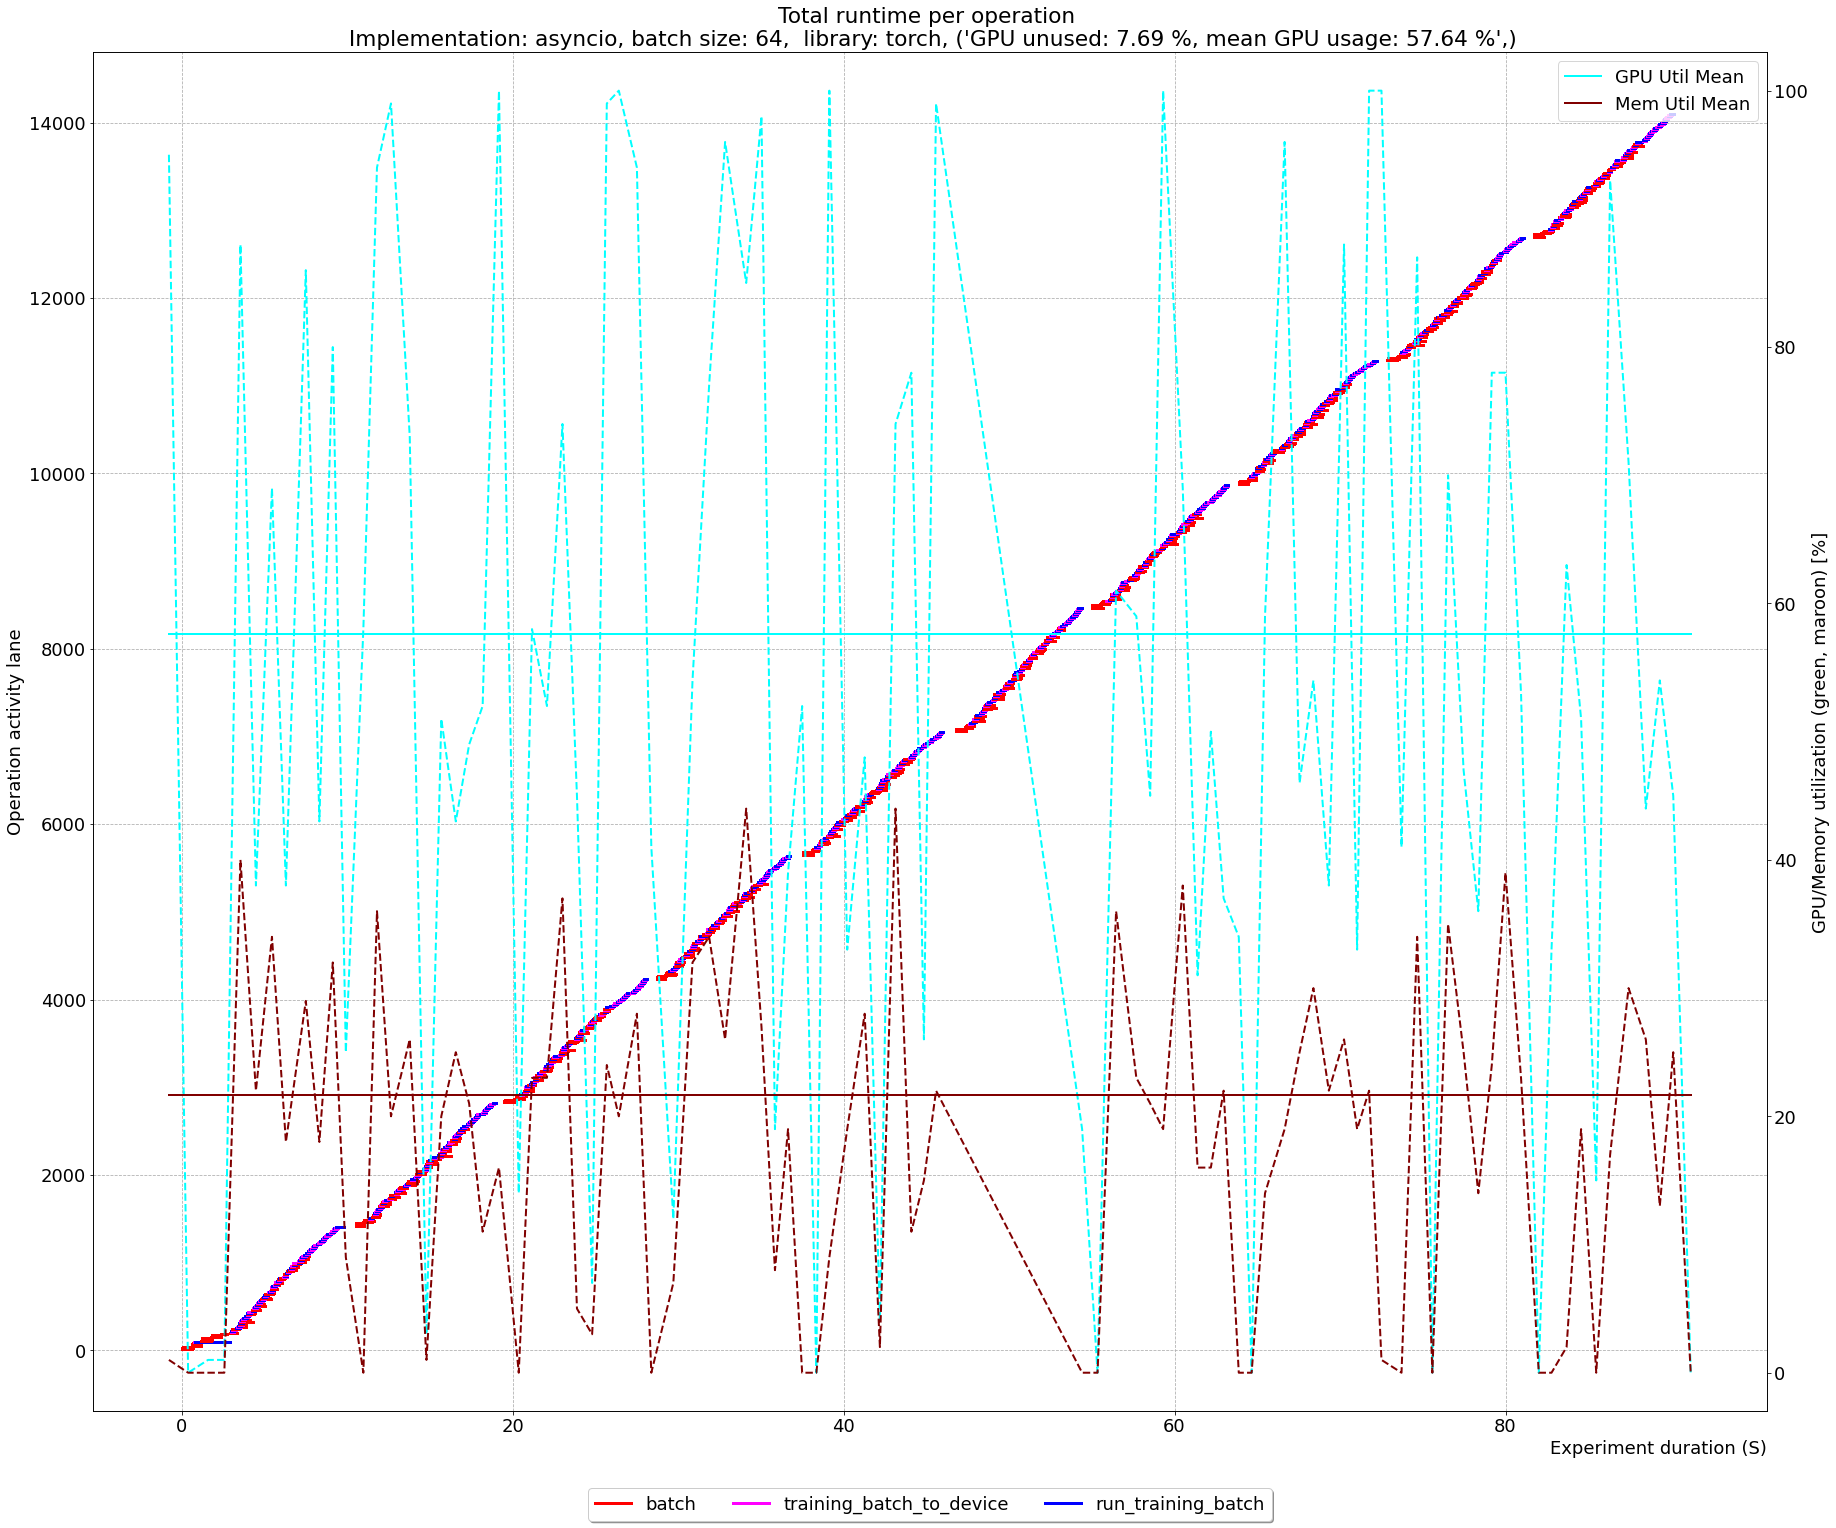

timestamp False
87.49074074074075 9.268817204301076


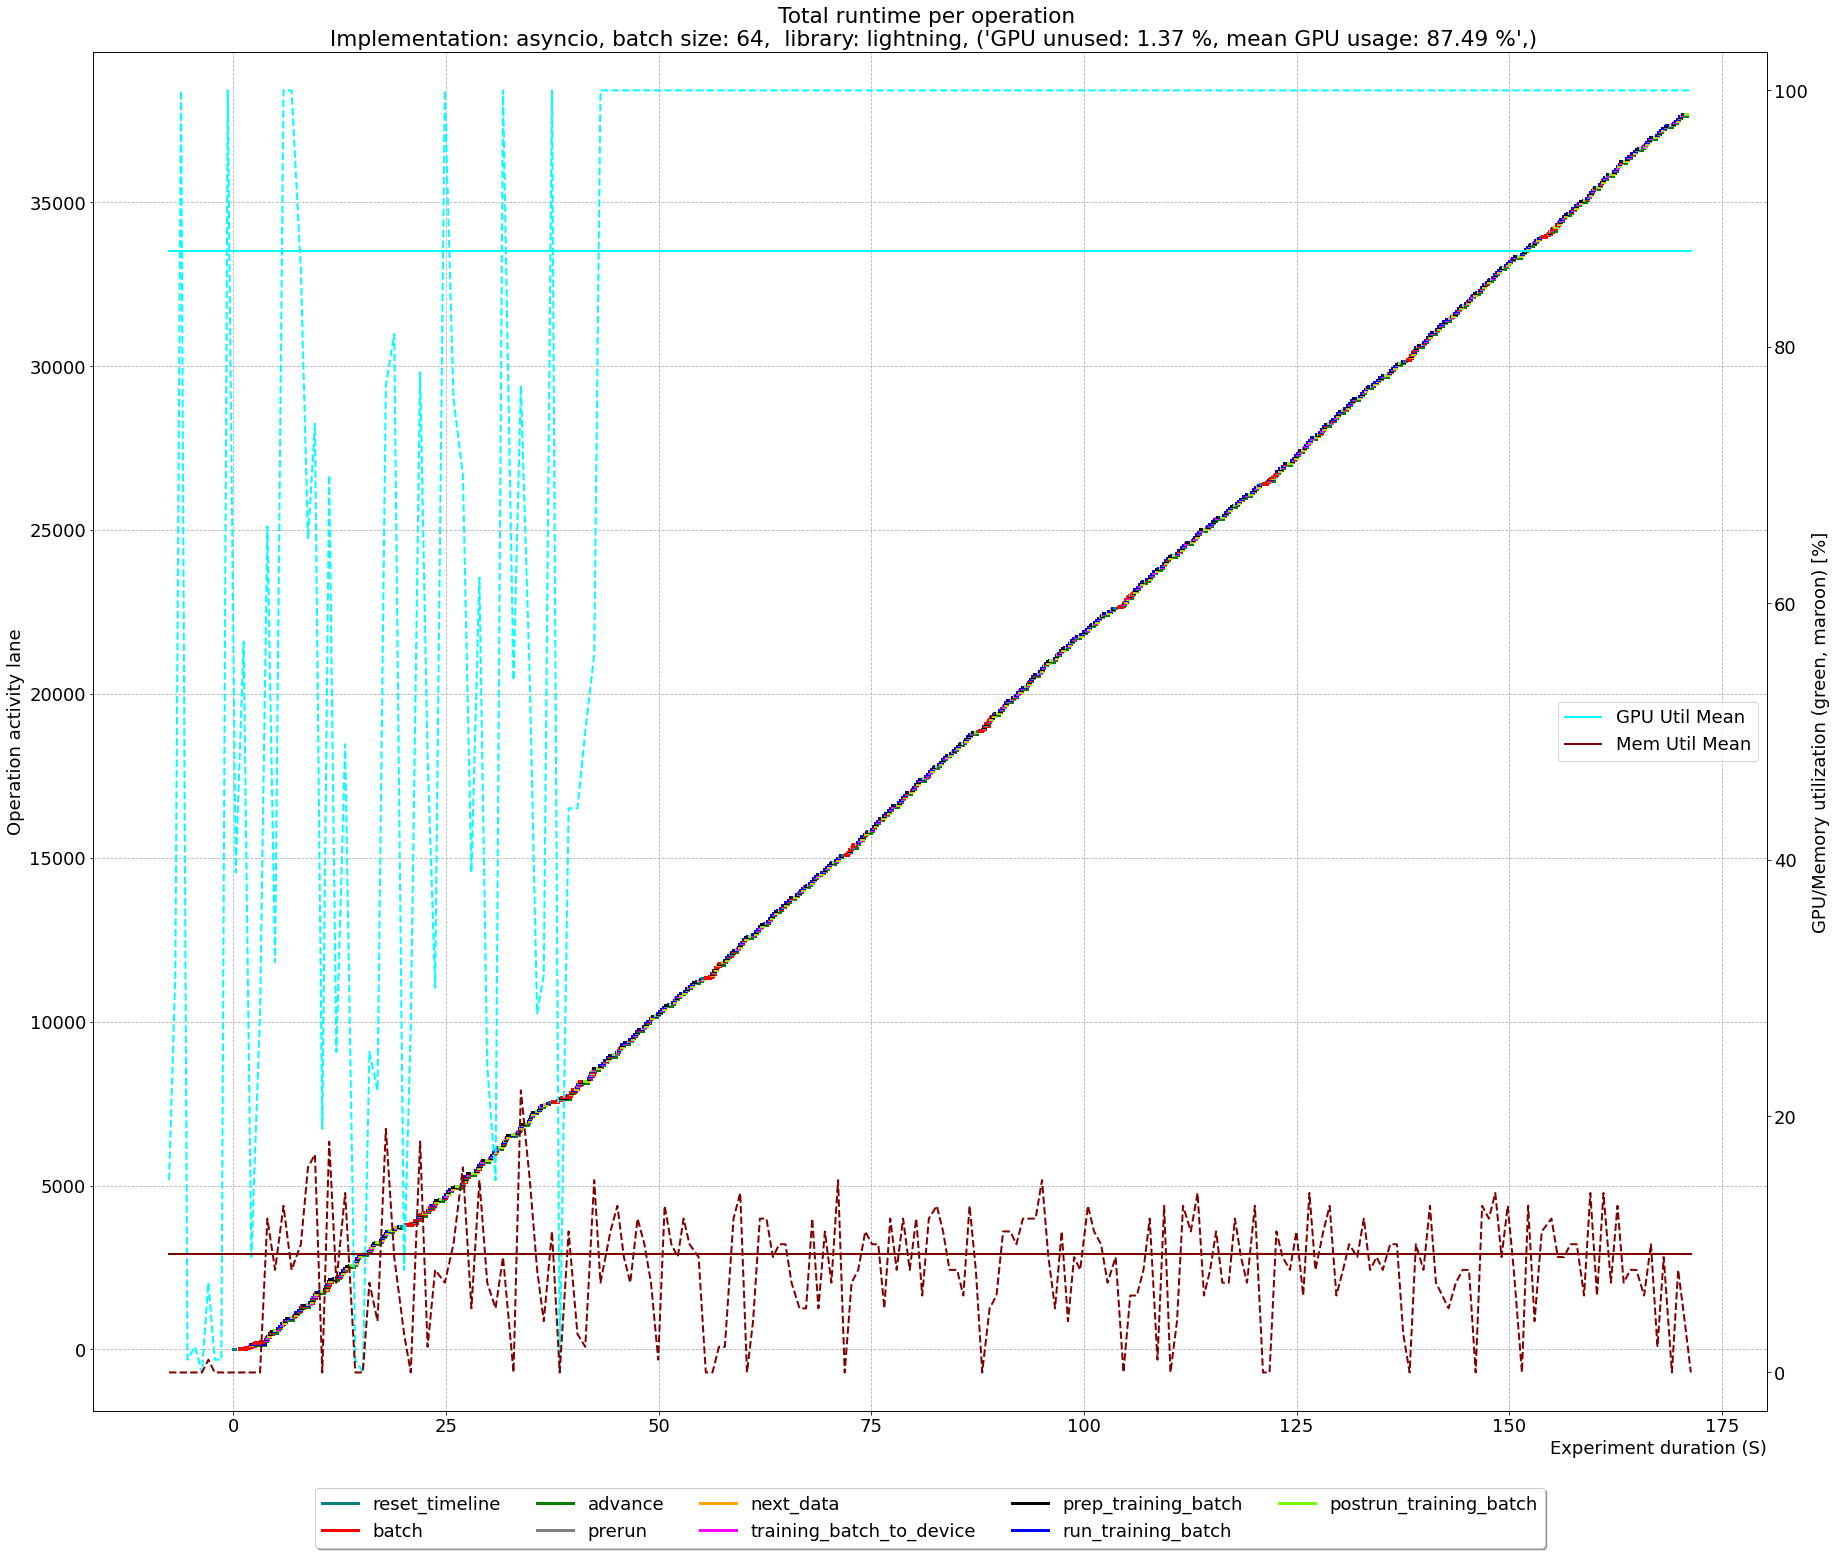

timestamp False
49.73770491803279 31.610169491525422


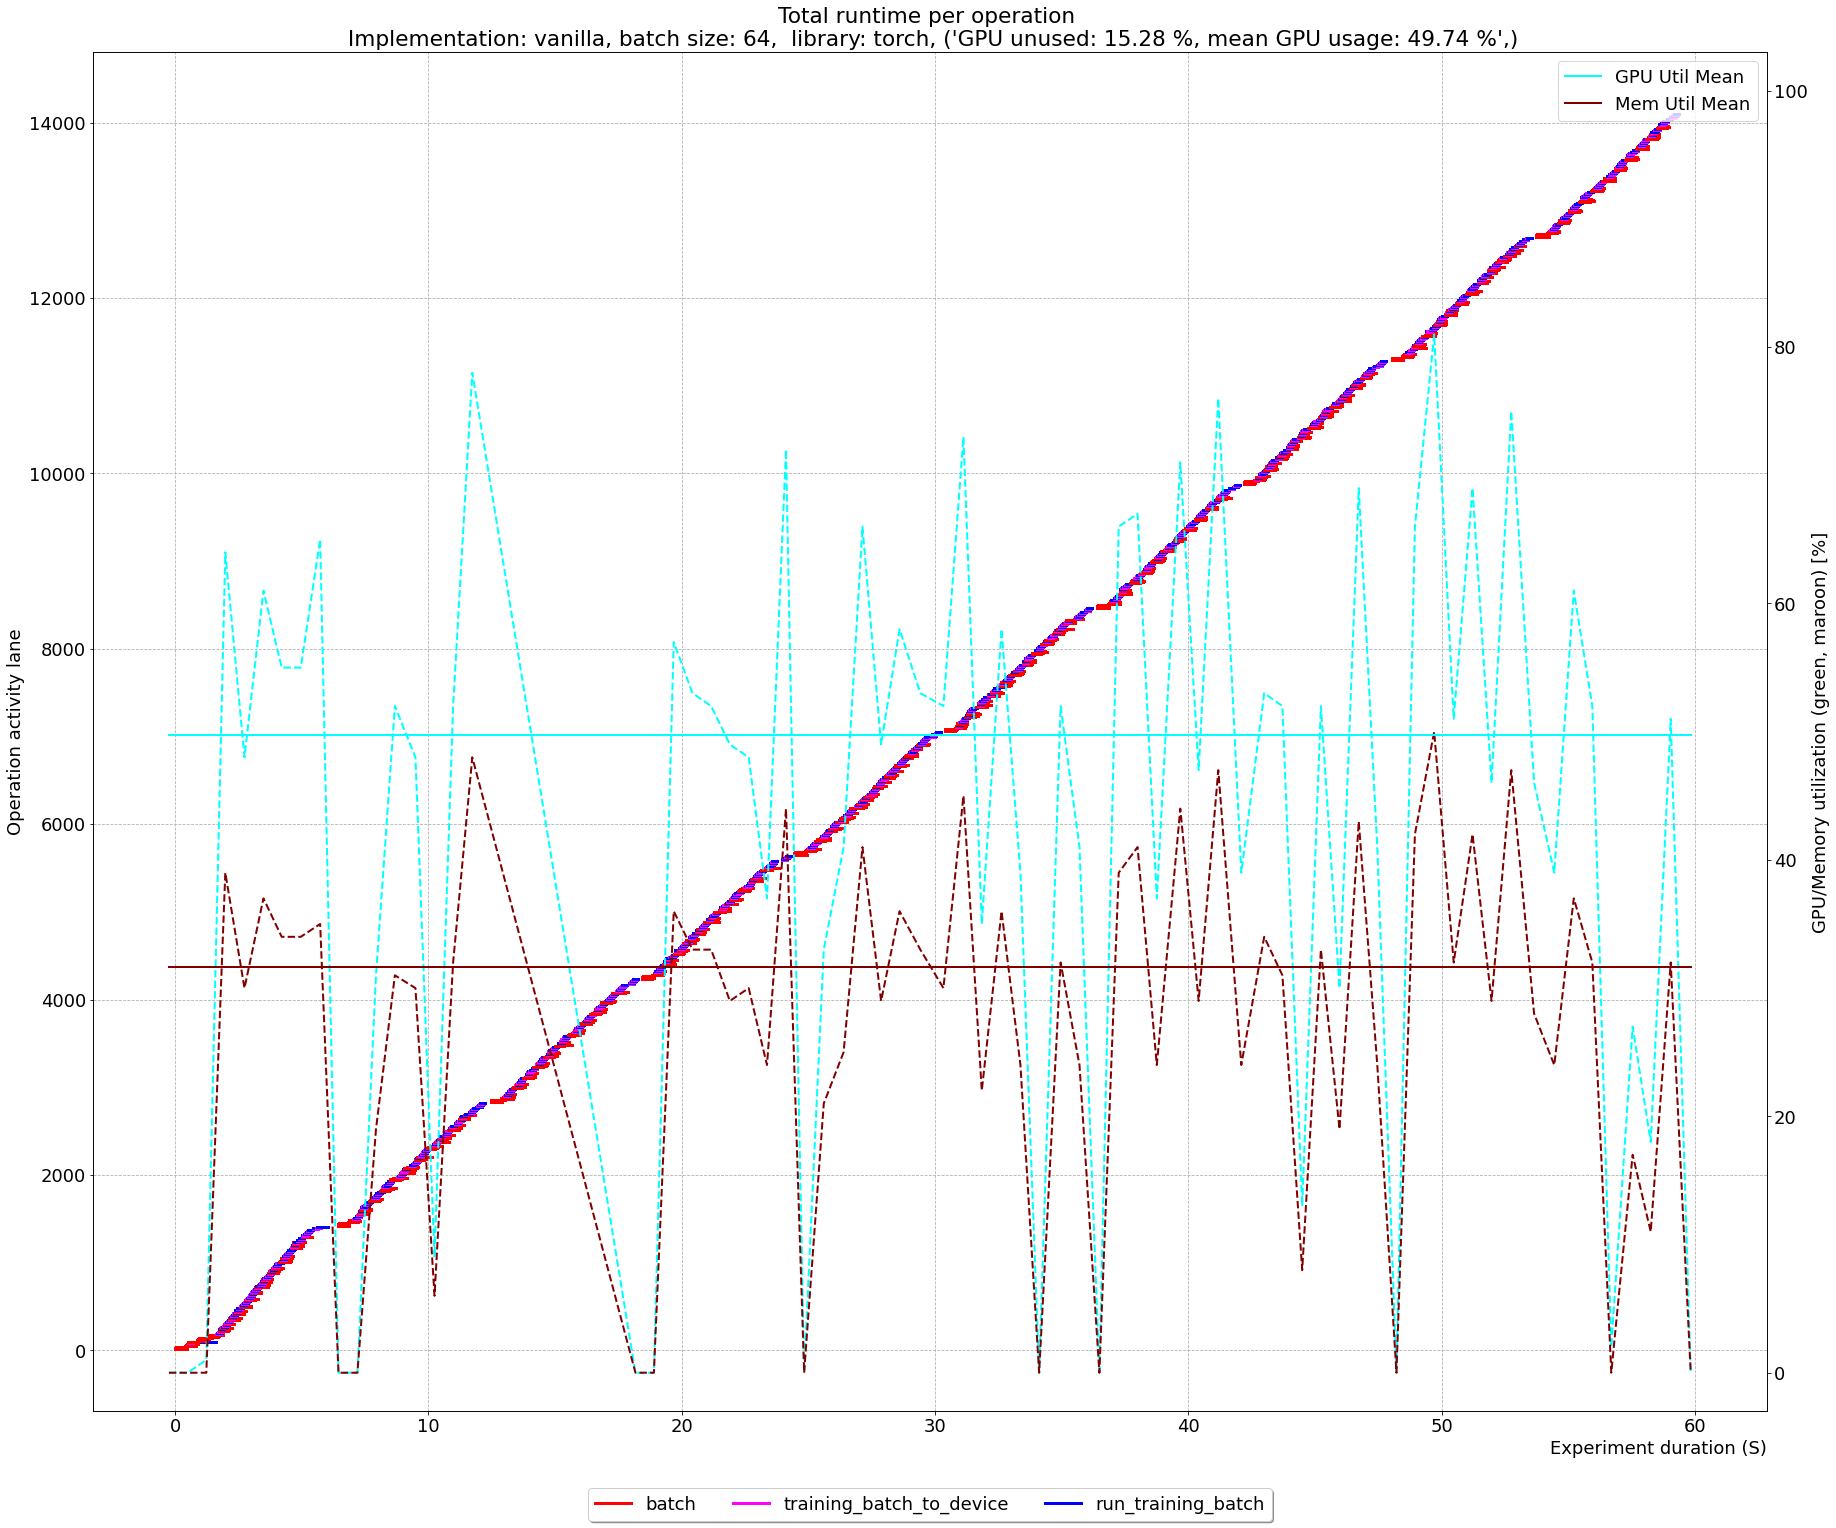

timestamp False
31.901041666666668 10.269938650306749


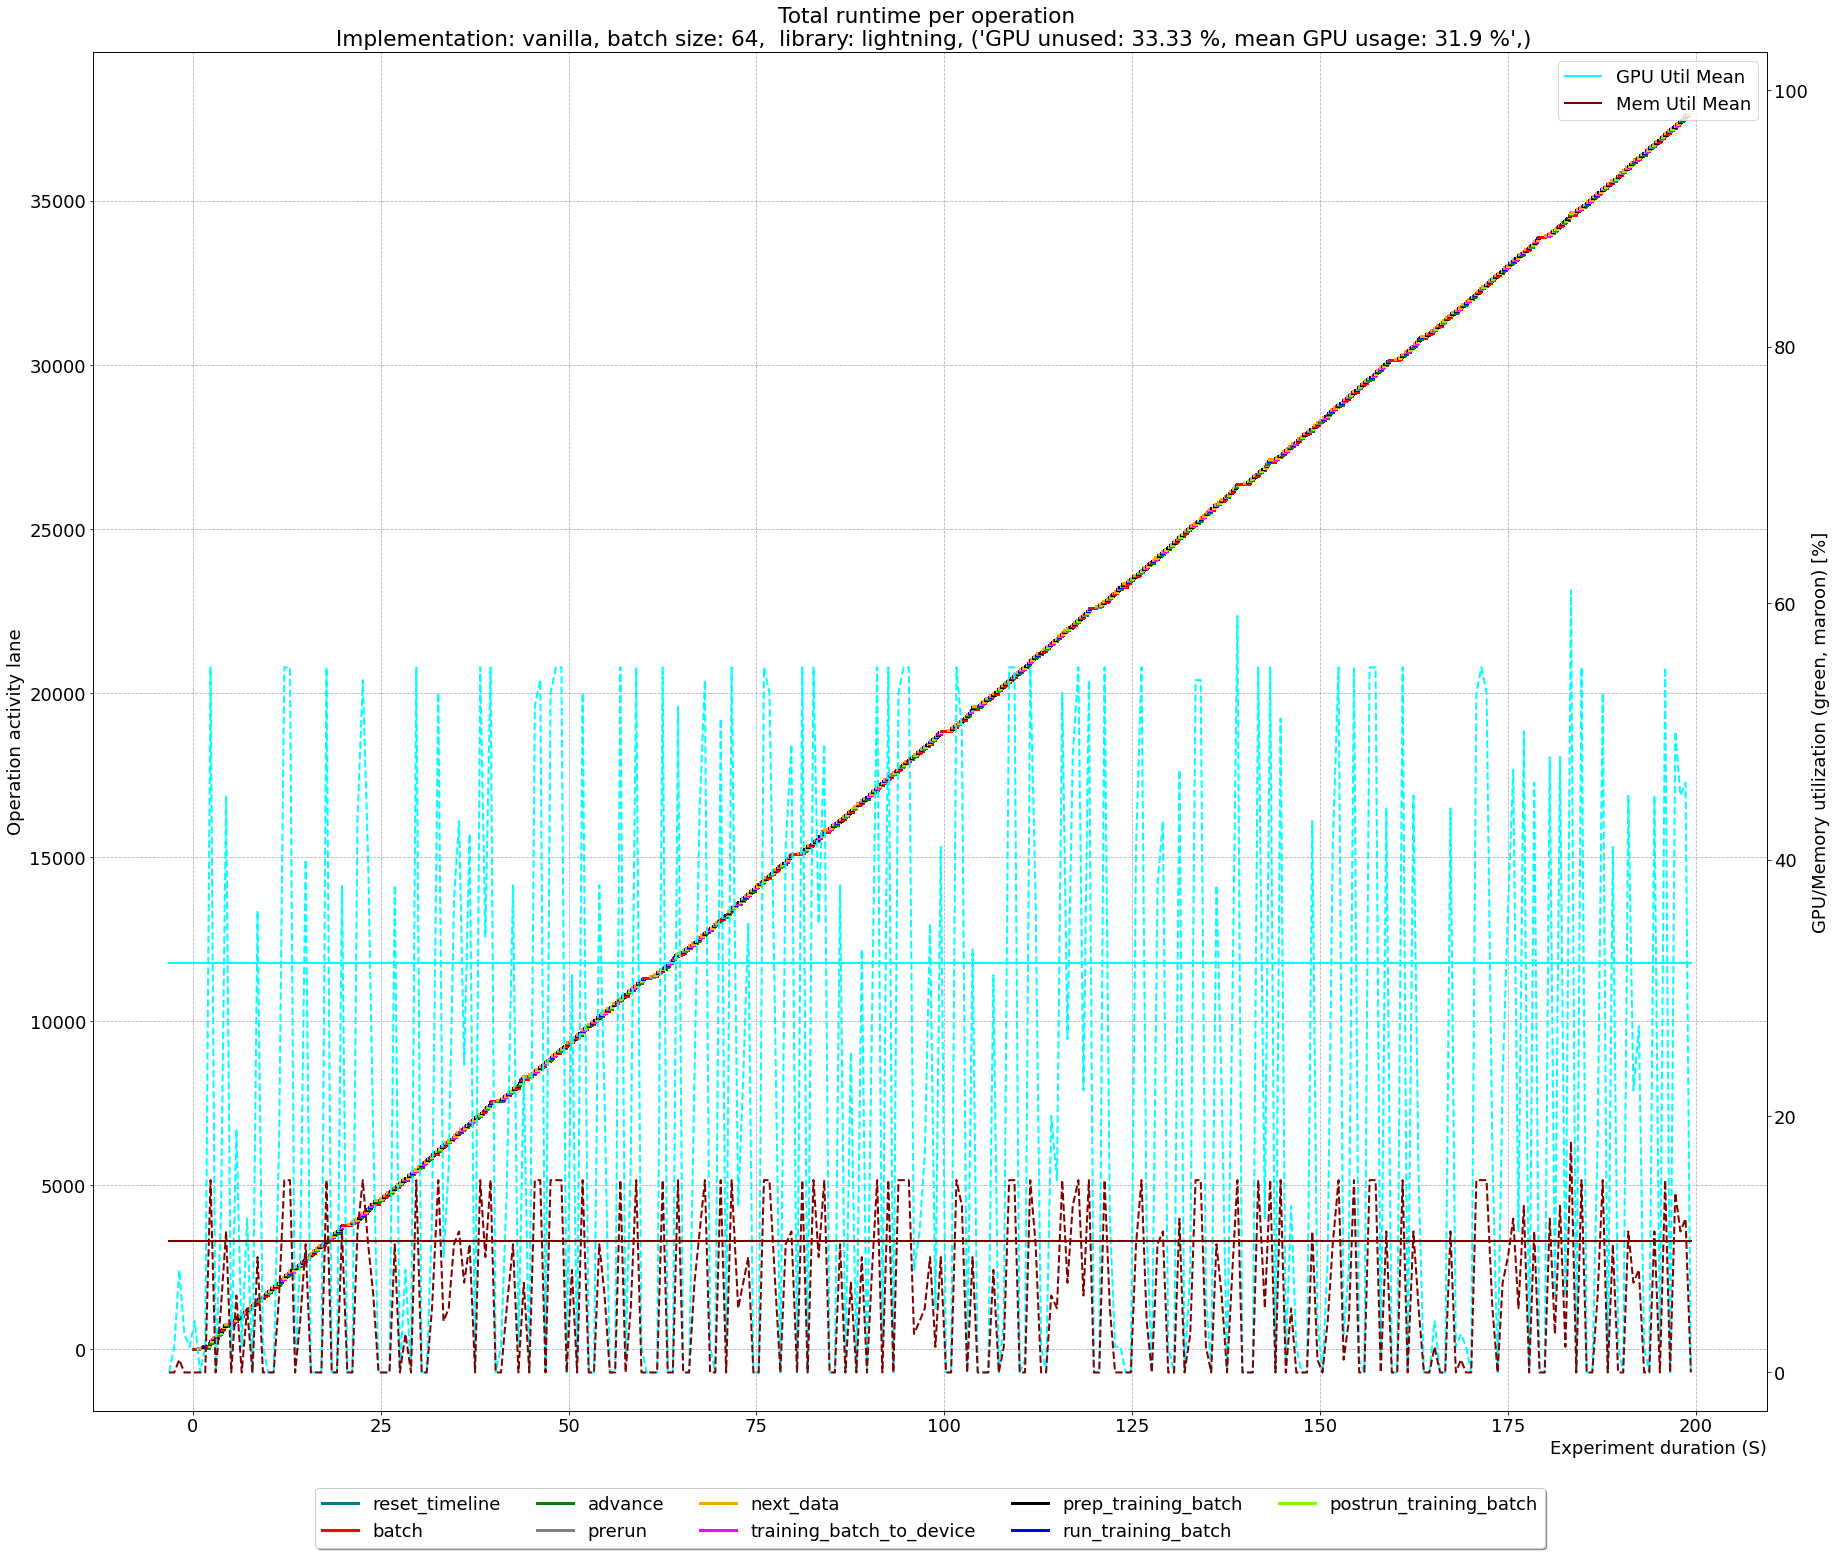

In [11]:
unique_runs_scratch, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_scratch)
returns_scratch = []

for run in sorted(unique_runs_scratch):
    df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
    dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False) 
    result = show_timelines_with_gpu(df=df, gpu_util=dfgpu, lanes=lanes, colors=colors, run=run, 
                                     flat=False, show_gpu=True, zoom=False, zoom_epochs=2,
                                     skip_plot=False, ms=False)
    result["run"]=run
    returns_scratch.append(result)

#### Result tables

The following two tables display throughput details for both experiments. The default sample size, i.e. number of dataset items is 300.

In [12]:
# sanity check
for i in range(len(unique_runs_s3)):
    get_metadata_info(output_base_folder / "1711-justfetch-2/s3" / unique_runs_s3[1])

Dataset:  3000
Batch size: 64
Epochs:  10
Images total:  30000
Batches per epoch 47
Images total (rounded):  30080
Dataset:  3000
Batch size: 64
Epochs:  10
Images total:  30000
Batches per epoch 47
Images total (rounded):  30080
Dataset:  3000
Batch size: 64
Epochs:  10
Images total:  30000
Batches per epoch 47
Images total (rounded):  30080
Dataset:  3000
Batch size: 64
Epochs:  10
Images total:  30000
Batches per epoch 47
Images total (rounded):  30080
Dataset:  3000
Batch size: 64
Epochs:  10
Images total:  30000
Batches per epoch 47
Images total (rounded):  30080
Dataset:  3000
Batch size: 64
Epochs:  10
Images total:  30000
Batches per epoch 47
Images total (rounded):  30080


#### AWS S3

In [13]:
df_full_s3 = extract_pandas(output_base_folder, folder_filter=s3_folder_filter)
results_s3 = pd.DataFrame.from_records(data=returns_s3)
r_s3 = get_throughput(results_s3, "1711-justfetch-2/s3", df_full_s3, unique_runs_s3, output_base_folder)
r_s3.round(2)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:08<00:00, 24.20it/s]


runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
0   126.96          26.43                   40.32          12.17   
1   183.62          20.71                   40.10           5.86   
2   160.03          23.66                   52.11           9.00   
3   215.98          14.12                   53.05           6.32   
4   521.92          19.39                   58.13           3.84   
5  2989.42          90.50                   41.64           0.44   

   mem_util_mean_no_zeros implementation cache    library                fig  \
0                   23.67       threaded     1      torch  Figure(2160x1800)   
1                   11.08       threaded     1  lightning  Figure(2160x1800)   
2                   16.61        asyncio     1      torch  Figure(2160x1800)   
3                    9.47        asyncio     1  lightning  Figure(2160x1800)   
4                   12.00        vanilla     1      torch  Figure(2160x1800)   
5                    7.50        vanilla     1  lightning  Figure(2160x1800)   

   throughput    dl_MB   imgs  Mbit/s   MB/s  
0      236.29  2747.84  30000  173.15  21.64  
1      163.38  2727.65  30000  118.84  14.86  
2      187.47  3110.65  30000  155.51  19.44  
3      138.90  3110.65  30000  115.22  14.40  
4       57.48  3110.65  30000   47.68   5.96  
5       10.04  3110.65  30000    8.32   1.04

#### Scratch

In [14]:
df_full_scratch = extract_pandas(output_base_folder, folder_filter=scratch_folder_filter)
results_scratch = pd.DataFrame.from_records(data=returns_scratch)
r_scratch = get_throughput(results_scratch, "1711-justfetch-2/scratch", df_full_scratch, unique_runs_scratch, output_base_folder)
r_scratch.round(2)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:07<00:00, 29.48it/s]


runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
0    84.42          20.63                   53.70          19.97   
1   202.39          15.69                   44.76           5.46   
2    89.99           7.69                   57.64          17.41   
3   170.88           1.37                   87.49           7.87   
4    59.20          15.28                   49.74          25.90   
5   198.98          33.33                   31.90           5.81   

   mem_util_mean_no_zeros implementation cache    library                fig  \
0                   27.96       threaded     1      torch  Figure(2160x1800)   
1                    9.44       threaded     1  lightning  Figure(2160x1800)   
2                   21.70        asyncio     1      torch  Figure(2160x1800)   
3                    9.27        asyncio     1  lightning  Figure(2160x1800)   
4                   31.61        vanilla     1      torch  Figure(2160x1800)   
5                   10.27        vanilla     1  lightning  Figure(2160x1800)   

   throughput    dl_MB   imgs  Mbit/s   MB/s  
0      355.39  4504.37  30000  426.88  53.36  
1      148.23  4897.74  30000  193.60  24.20  
2      333.38  2857.10  30000  254.00  31.75  
3      175.57  2857.10  30000  133.76  16.72  
4      506.73  2857.10  30000  386.07  48.26  
5      150.77  2857.10  30000  114.87  14.36

In [15]:
r_s3.to_csv("r_s3.csv")
r_scratch.to_csv("r_scratch.csv")
